In [301]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from scipy.stats import pointbiserialr, ttest_ind, chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

In [2]:
OG = pd.read_csv("train_ZoGVYWq.csv")

In [3]:
OG.describe(include='all')

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853,79853,79853.000000,79853.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,Urban,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43134,48183,NaN,NaN
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,NaN,NaN,10924.507533,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,NaN,NaN,9401.676542,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,NaN,NaN,1200.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,NaN,NaN,5400.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,NaN,NaN,7500.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,NaN,NaN,13800.000000,1.000000


In [4]:
OG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79756 non-null  float64
 5   Count_6-12_months_late            79756 non-null  float64
 6   Count_more_than_12_months_late    79756 non-null  float64
 7   application_underwriting_score    76879 non-null  float64
 8   no_of_premiums_paid               79853 non-null  int64  
 9   sourcing_channel                  79853 non-null  object 
 10  residence_area_type               79853 non-null  object 
 11  premium                           79853 non-null  int64  
 12  rene

/var/folders/px/m5h1yxzn2qz9mnt9ftzp3hqc0000gn/T/ipykernel_29728/1170618611.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='renewal', data=OG, palette=['#4C72B0', '#55A868'])


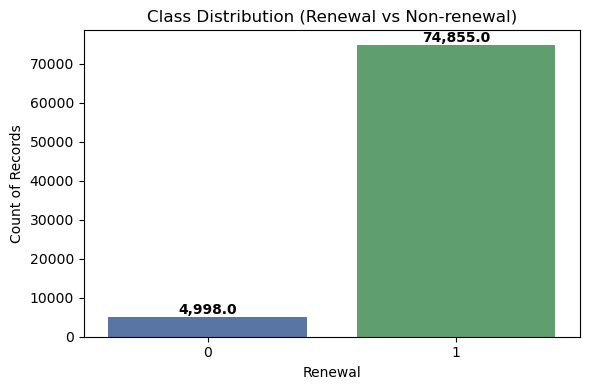

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of records by target
plt.figure(figsize=(6,4))
sns.countplot(x='renewal', data=OG, palette=['#4C72B0', '#55A868'])

# Add labels on top of bars
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Class Distribution (Renewal vs Non-renewal)")
plt.xlabel("Renewal")
plt.ylabel("Count of Records")
plt.tight_layout()
plt.show()


In [11]:
# Show duplicate records
OG[OG.duplicated()]


,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal


In [13]:
OG[OG.duplicated(subset=['perc_premium_paid_by_cash_credit', 
                      'age_in_days', 
                      'Income', 
                      'Count_3-6_months_late', 
                      'Count_6-12_months_late',
                      'Count_more_than_12_months_late',
                      'application_underwriting_score',
                      'no_of_premiums_paid',
                      'sourcing_channel',
                      'residence_area_type',
                      'premium',
                      'renewal'])]

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal


In [15]:
OG.shape

(79853, 13)

In [17]:
OG.isna().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
renewal                                0
dtype: int64

In [19]:
missing_cols = OG.columns[OG.isnull().any()].tolist()
missing_cols

['Count_3-6_months_late',
 'Count_6-12_months_late',
 'Count_more_than_12_months_late',
 'application_underwriting_score']

In [21]:
all_missing_records = OG[OG[missing_cols].isnull().all(axis=1)]
print("Rows where ALL missing columns are NaN:", len(all_missing_records))

Rows where ALL missing columns are NaN: 73


In [23]:
OG['Count_3-6_months_late'].value_counts(dropna=False)

Count_3-6_months_late
0.0     66801
1.0      8826
2.0      2519
3.0       954
4.0       374
5.0       168
NaN        97
6.0        68
7.0        23
8.0        15
9.0         4
13.0        1
12.0        1
11.0        1
10.0        1
Name: count, dtype: int64

In [25]:
OG['Count_6-12_months_late'].value_counts(dropna=False)

Count_6-12_months_late
0.0     75831
1.0      2680
2.0       693
3.0       317
4.0       130
NaN        97
5.0        46
6.0        26
7.0        11
8.0         5
10.0        4
9.0         4
11.0        2
14.0        2
13.0        2
17.0        1
15.0        1
12.0        1
Name: count, dtype: int64

In [27]:
OG['Count_more_than_12_months_late'].value_counts(dropna=False)

Count_more_than_12_months_late
0.0     76038
1.0      2996
2.0       498
3.0       151
NaN        97
4.0        48
5.0        13
6.0         6
7.0         3
8.0         2
11.0        1
Name: count, dtype: int64

In [29]:
OG['application_underwriting_score'].value_counts(dropna=False)

application_underwriting_score
NaN      2974
99.89    1972
99.88    1343
99.87     856
99.86     693
         ... 
94.07       1
92.71       1
92.50       1
92.85       1
93.57       1
Name: count, Length: 673, dtype: int64

In [31]:
# Age in years
OG['age_in_years'] = (OG['age_in_days'] / 365).astype(int)

# Age buckets
OG['age_group'] = pd.cut(
    OG['age_in_years'],
    bins=[0, 25, 40, 60, 100],
    labels=['<25', '25-40', '40-60', '60+']
)

# Premium buckets (quartiles as example)
OG['premium_group'] = pd.qcut(OG['premium'], 4, labels=['Low','Medium','High','Very High'])


In [33]:
renewal_rate = OG.groupby(['age_group','premium_group'])['renewal'].mean().unstack()
print(renewal_rate)

premium_group       Low    Medium      High  Very High
age_group                                             
<25            0.891685  0.894737  0.931034   0.947368
25-40          0.898873  0.905752  0.928066   0.927567
40-60          0.920076  0.920842  0.937671   0.948241
60+            0.965924  0.968470  0.968213   0.976725


/var/folders/px/m5h1yxzn2qz9mnt9ftzp3hqc0000gn/T/ipykernel_29728/3223351804.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  renewal_rate = OG.groupby(['age_group','premium_group'])['renewal'].mean().unstack()


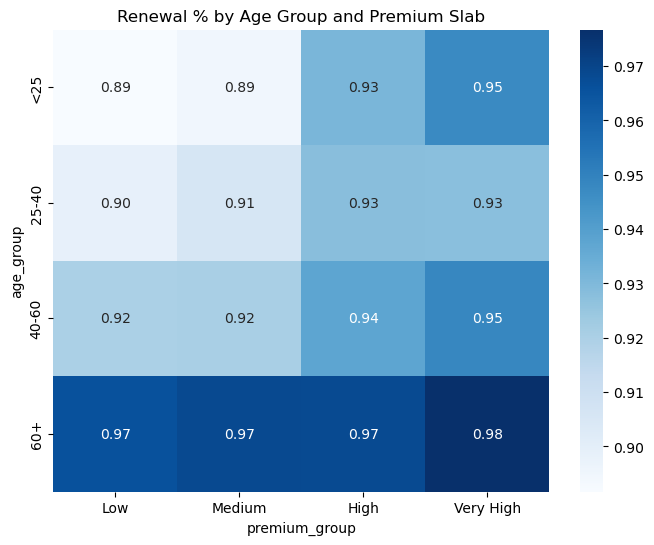

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(renewal_rate, annot=True, fmt=".2f", cmap="Blues")
plt.title("Renewal % by Age Group and Premium Slab")
plt.show()


In [37]:
OG_clean = OG.drop(columns=['id'])

In [39]:
OG_clean.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal,age_in_years,age_group,premium_group
0,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,33,25-40,Low
1,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,59,40-60,Very High
2,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,48,40-60,Low
3,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,42,40-60,High
4,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,86,60+,High


In [42]:
# Columns to impute
late_cols = ['Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late']

# Create a copy for imputation
OG_late_imputed = OG_clean.copy()

# Impute missing values with 0
OG_late_imputed[late_cols] = OG_late_imputed[late_cols].fillna(0)

# Quick check
print(OG_late_imputed[late_cols].isnull().sum())


Count_3-6_months_late             0
Count_6-12_months_late            0
Count_more_than_12_months_late    0
dtype: int64


In [44]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = OG_late_imputed[OG_late_imputed['renewal'] == 1]
df_minority = OG_late_imputed[OG_late_imputed['renewal'] == 0]

# Downsample majority class
df_majority_downsampled = resample(
    df_majority,
    replace=False,             # sample without replacement
    n_samples=len(df_minority),# match minority count
    random_state=42            # reproducibility
)

# Combine back balanced dataset
OG_balanced = pd.concat([df_majority_downsampled, df_minority])


In [46]:
OG_balanced.shape

(9996, 15)

In [48]:
OG_balanced['renewal'].value_counts()


renewal
1    4998
0    4998
Name: count, dtype: int64

In [50]:
OG_balanced['age_in_years'] = (OG_balanced['age_in_days'] / 365).astype(int)

OG_balanced['age_group'] = pd.cut(
    OG_balanced['age_in_years'],
    bins=[0, 25, 40, 60, 100],
    labels=['<25', '25-40', '40-60', '60+']
)

OG_balanced['income_group'] = pd.qcut(OG_balanced['Income'], q=3, labels=['Low','Medium','High'])
OG_balanced['premium_group'] = pd.qcut(OG_balanced['premium'], q=4, labels=['Low','Medium','High','Very High'])
OG_balanced['premium_paid_group'] = pd.qcut(OG_balanced['no_of_premiums_paid'], q=3, labels=['Low','Medium','High'])


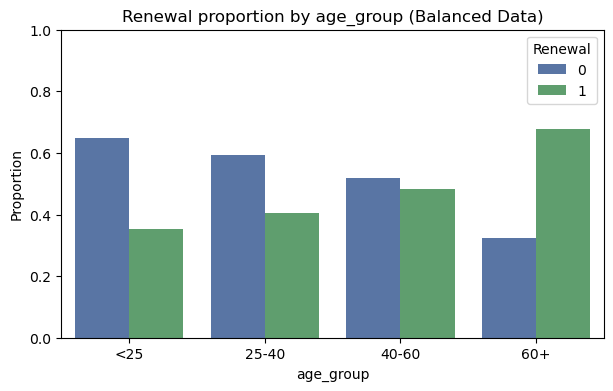

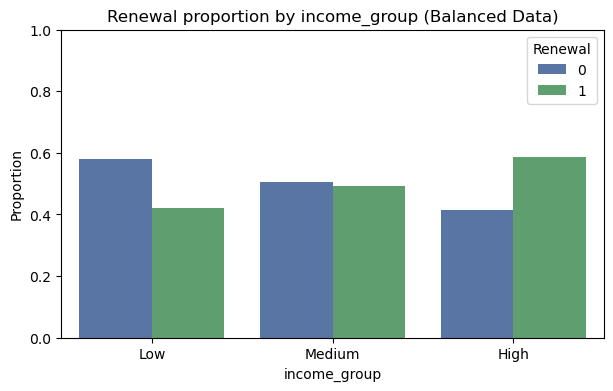

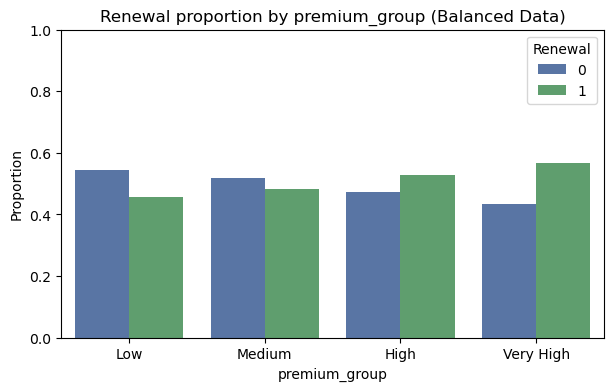

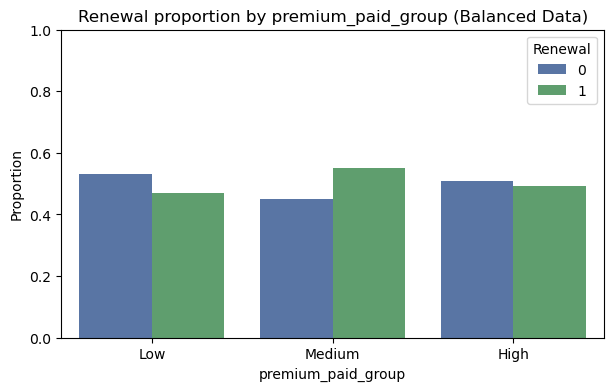

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

bucket_cols = ['age_group', 'income_group', 'premium_group', 'premium_paid_group']

for col in bucket_cols:
    crosstab = pd.crosstab(OG_balanced[col], OG_balanced['renewal'], normalize='index')
    crosstab = crosstab.reset_index().melt(id_vars=col, value_name='Proportion', var_name='Renewal')
    
    plt.figure(figsize=(7,4))
    sns.barplot(x=col, y='Proportion', hue='Renewal', data=crosstab, palette=['#4C72B0', '#55A868'])
    plt.title(f"Renewal proportion by {col} (Balanced Data)")
    plt.ylabel("Proportion")
    plt.xlabel(col)
    plt.ylim(0,1)
    plt.show()


In [54]:
from sklearn.tree import DecisionTreeClassifier

def supervised_binning(df, feature, target, max_depth=3, min_samples_leaf=0.05):
    """
    Finds optimal cut points for a feature using a decision tree.
    """
    X = df[[feature]].dropna()
    y = df.loc[X.index, target]

    # Train shallow decision tree
    tree = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf, # as % of total
        random_state=42
    )
    tree.fit(X, y)

    # Extract thresholds
    thresholds = sorted(set(tree.tree_.threshold[tree.tree_.threshold > 0]))
    return thresholds


In [56]:
features_to_bin = ['age_in_years', 'Income', 'premium', 'no_of_premiums_paid']

for feature in features_to_bin:
    cuts = supervised_binning(OG_balanced, feature, 'renewal')
    print(f"Suggested cut points for {feature}: {cuts}")


Suggested cut points for age_in_years: [28.5, 35.5, 52.5, 54.5, 57.5, 62.5, 67.5]
Suggested cut points for Income: [77155.0, 102130.0, 120095.0, 160050.0, 182970.0, 200095.0, 300015.0]
Suggested cut points for premium: [4350.0, 6600.0, 8550.0, 10650.0, 14850.0, 21150.0]
Suggested cut points for no_of_premiums_paid: [3.5, 5.5, 13.5]


In [58]:
age_cuts = supervised_binning(OG_balanced, 'age_in_years', 'renewal')
OG_balanced['age_tree_bins'] = pd.cut(OG_balanced['age_in_years'], bins=[-np.inf] + age_cuts + [np.inf])


In [60]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier


def supervised_binning(df, feature, target, max_depth=3, min_samples_leaf=0.05):
    """
    Finds optimal cut points for a feature using a decision tree
    and creates a binned column with range labels (min to max).
    """
    X = df[[feature]].dropna()
    y = df.loc[X.index, target]

    tree = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    tree.fit(X, y)

    # Extract thresholds
    thresholds = sorted(set(tree.tree_.threshold[tree.tree_.threshold > 0]))
    
    # Use actual min/max instead of inf
    min_val = df[feature].min()
    max_val = df[feature].max()
    
    bins = [min_val] + thresholds + [max_val]
    bin_labels = [f"{int(bins[i])} – {int(bins[i+1])}" for i in range(len(bins)-1)]
    
    # Add new binned column with ranges
    df[f"{feature}_tree_bin"] = pd.cut(df[feature], bins=bins, labels=bin_labels, include_lowest=True, duplicates="drop")
    
    return thresholds, bin_labels


In [62]:
features_to_bin = ['age_in_years', 'Income', 'premium', 'no_of_premiums_paid']

for feature in features_to_bin:
    cuts = supervised_binning(OG_balanced, feature, 'renewal')
    print(f"Suggested cut points for {feature}: {cuts}")


Suggested cut points for age_in_years: ([28.5, 35.5, 52.5, 54.5, 57.5, 62.5, 67.5], ['21 – 28', '28 – 35', '35 – 52', '52 – 54', '54 – 57', '57 – 62', '62 – 67', '67 – 101'])
Suggested cut points for Income: ([77155.0, 102130.0, 120095.0, 160050.0, 182970.0, 200095.0, 300015.0], ['24030 – 77155', '77155 – 102130', '102130 – 120095', '120095 – 160050', '160050 – 182970', '182970 – 200095', '200095 – 300015', '300015 – 7500070'])
Suggested cut points for premium: ([4350.0, 6600.0, 8550.0, 10650.0, 14850.0, 21150.0], ['1200 – 4350', '4350 – 6600', '6600 – 8550', '8550 – 10650', '10650 – 14850', '14850 – 21150', '21150 – 60000'])
Suggested cut points for no_of_premiums_paid: ([3.5, 5.5, 13.5], ['2 – 3', '3 – 5', '5 – 13', '13 – 59'])


In [64]:
def plot_tree_bins(df, feature):
    binned_col = f"{feature}_tree_bin"
    
    crosstab = pd.crosstab(df[binned_col], df['renewal'], normalize='index')
    crosstab = crosstab.reset_index().melt(id_vars=binned_col, value_name='Proportion', var_name='Renewal')
    
    plt.figure(figsize=(12,6))  # wider figure
    sns.barplot(x=binned_col, y='Proportion', hue='Renewal', data=crosstab, palette=['#4C72B0', '#55A868'])
    plt.title(f"Renewal proportion by tree-based bins of {feature}")
    plt.ylabel("Proportion")
    plt.xlabel(f"{feature} (bins)")
    plt.ylim(0,1)
    plt.xticks(rotation=45, ha='right')
    plt.show()


age_in_years cut points: [28.5, 35.5, 52.5, 54.5, 57.5, 62.5, 67.5]
age_in_years bin labels: ['21 – 28', '28 – 35', '35 – 52', '52 – 54', '54 – 57', '57 – 62', '62 – 67', '67 – 101']


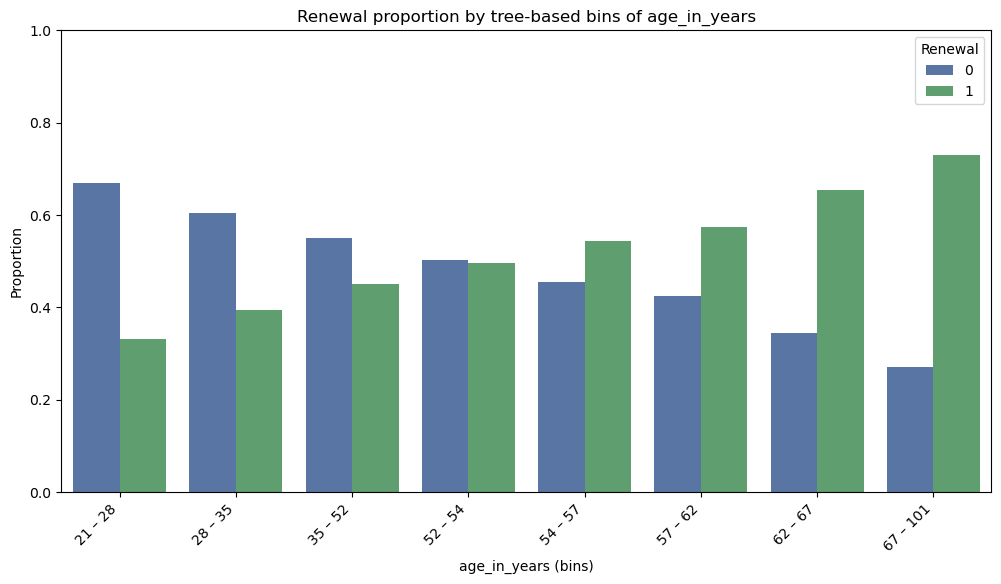

Income cut points: [77155.0, 102130.0, 120095.0, 160050.0, 182970.0, 200095.0, 300015.0]
Income bin labels: ['24030 – 77155', '77155 – 102130', '102130 – 120095', '120095 – 160050', '160050 – 182970', '182970 – 200095', '200095 – 300015', '300015 – 7500070']


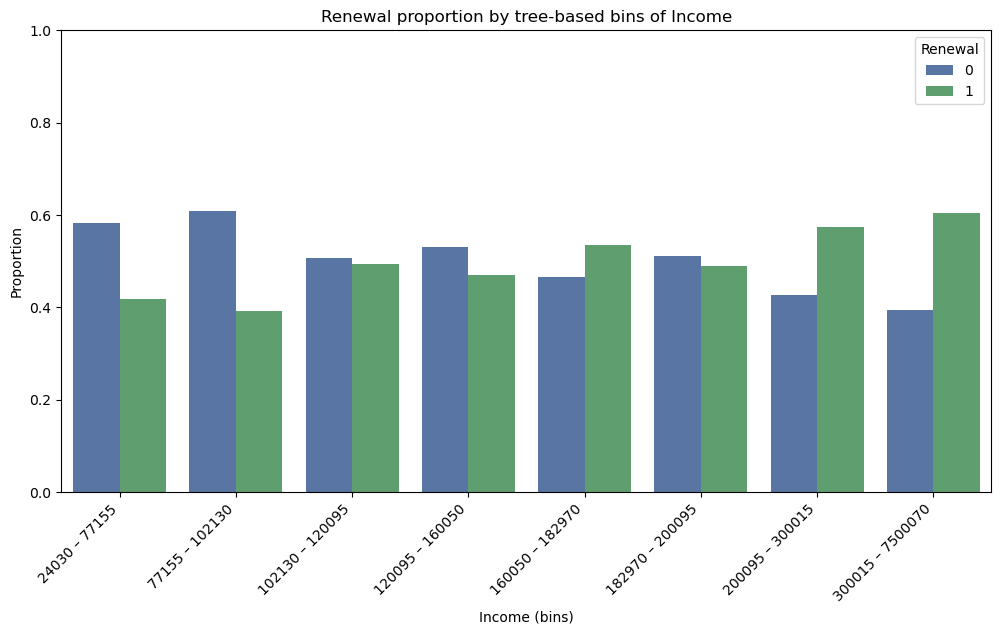

premium cut points: [4350.0, 6600.0, 8550.0, 10650.0, 14850.0, 21150.0]
premium bin labels: ['1200 – 4350', '4350 – 6600', '6600 – 8550', '8550 – 10650', '10650 – 14850', '14850 – 21150', '21150 – 60000']


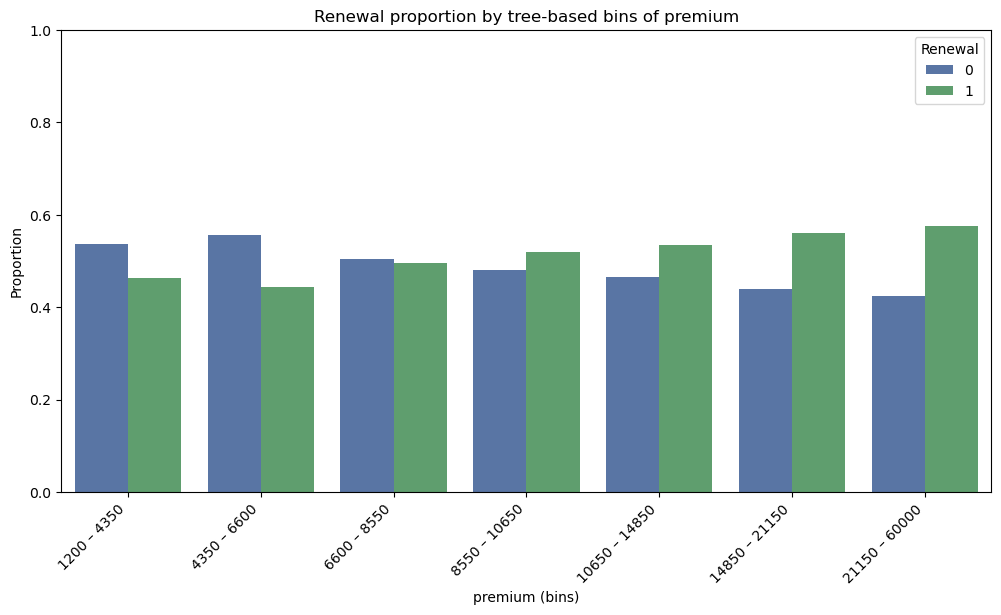

no_of_premiums_paid cut points: [3.5, 5.5, 13.5]
no_of_premiums_paid bin labels: ['2 – 3', '3 – 5', '5 – 13', '13 – 59']


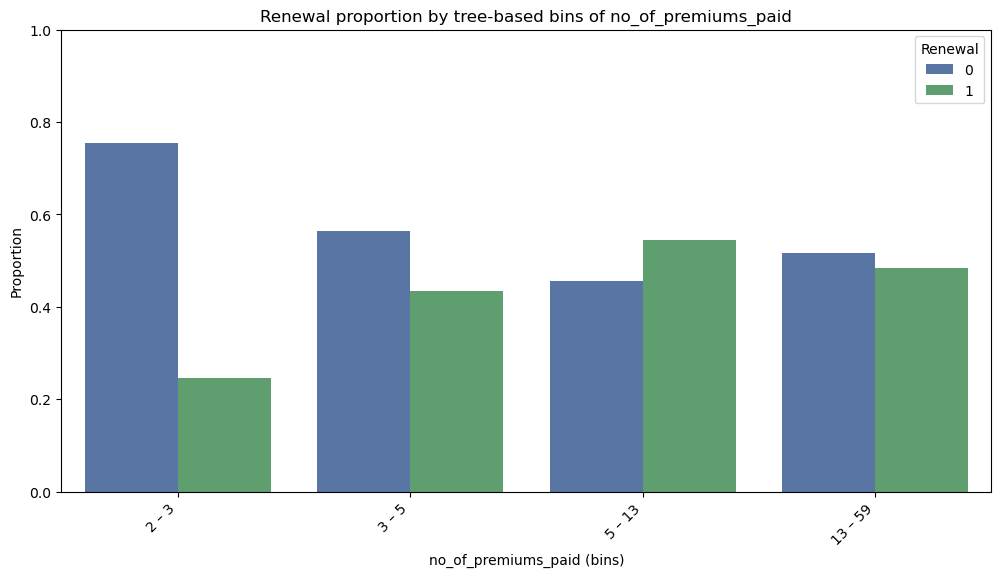

In [66]:
features_to_bin = ['age_in_years', 'Income', 'premium', 'no_of_premiums_paid']

for feature in features_to_bin:
    cuts, labels = supervised_binning(OG_balanced, feature, 'renewal')
    print(f"{feature} cut points: {cuts}")
    print(f"{feature} bin labels: {labels}")
    plot_tree_bins(OG_balanced, feature)


In [67]:
def supervised_binning(df, feature, target, max_depth=2, min_samples_leaf=0.1):
    """
    Finds optimal cut points for a feature using a decision tree
    and creates a binned column with fewer, larger bins.
    """
    X = df[[feature]].dropna()
    y = df.loc[X.index, target]

    tree = DecisionTreeClassifier(
        max_depth=max_depth,          # restrict depth
        min_samples_leaf=min_samples_leaf,  # ensure enough samples per bin
        random_state=42
    )
    tree.fit(X, y)

    # Extract thresholds
    thresholds = sorted(set(tree.tree_.threshold[tree.tree_.threshold > 0]))
    
    # Use actual min/max instead of inf
    min_val = df[feature].min()
    max_val = df[feature].max()
    
    bins = [min_val] + thresholds + [max_val]
    bin_labels = [f"{int(bins[i])} – {int(bins[i+1])}" for i in range(len(bins)-1)]
    
    # Add new binned column
    df[f"{feature}_tree_bin"] = pd.cut(df[feature], bins=bins, labels=bin_labels, include_lowest=True, duplicates="drop")
    
    return thresholds, bin_labels


age_in_years cut points: [35.5, 54.5, 62.5]
age_in_years bin labels: ['21 – 35', '35 – 54', '54 – 62', '62 – 101']


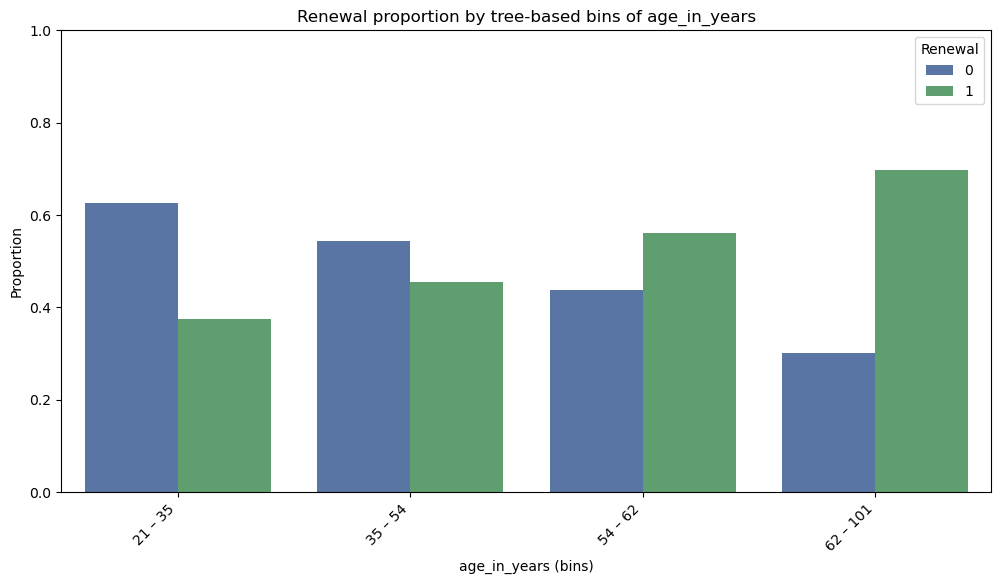

Income cut points: [102130.0, 160050.0, 200095.0]
Income bin labels: ['24030 – 102130', '102130 – 160050', '160050 – 200095', '200095 – 7500070']


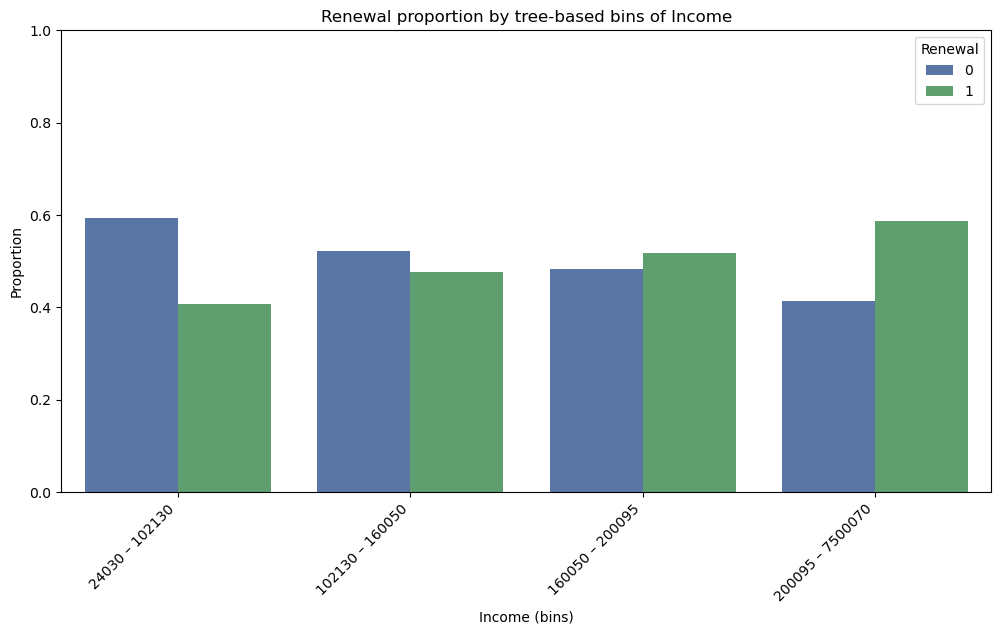

premium cut points: [6600.0, 8550.0, 14850.0]
premium bin labels: ['1200 – 6600', '6600 – 8550', '8550 – 14850', '14850 – 60000']


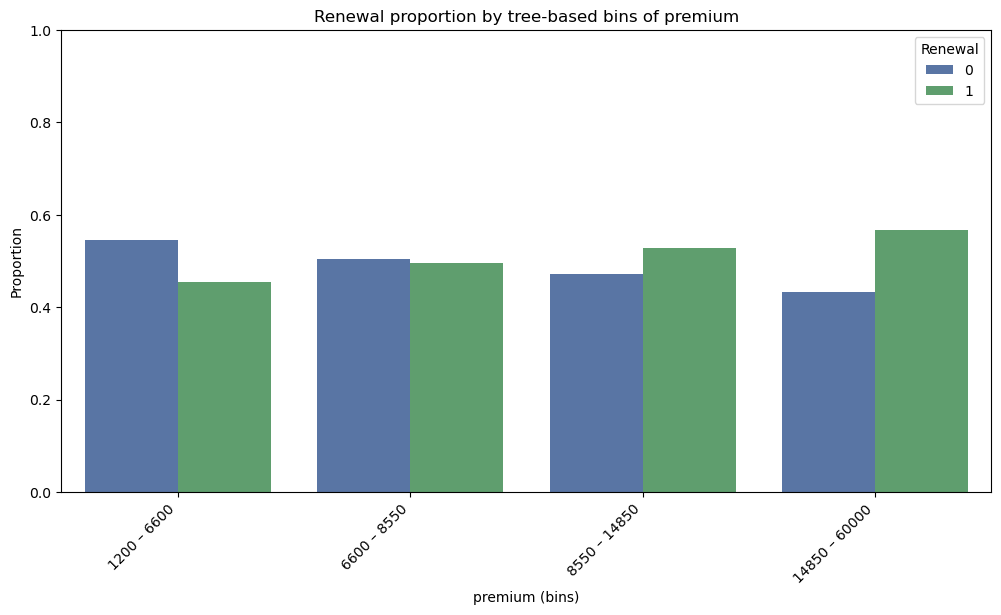

no_of_premiums_paid cut points: [4.5, 15.5]
no_of_premiums_paid bin labels: ['2 – 4', '4 – 15', '15 – 59']


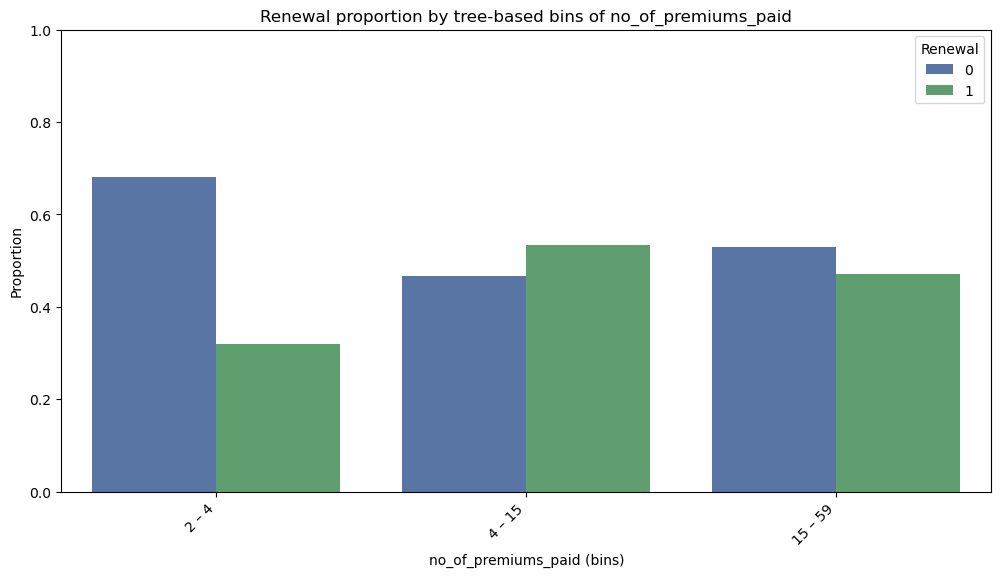

In [70]:
for feature in ['age_in_years', 'Income', 'premium', 'no_of_premiums_paid']:
    cuts, labels = supervised_binning(OG_balanced, feature, 'renewal', max_depth=2, min_samples_leaf=0.1)
    print(f"{feature} cut points: {cuts}")
    print(f"{feature} bin labels: {labels}")
    plot_tree_bins(OG_balanced, feature)


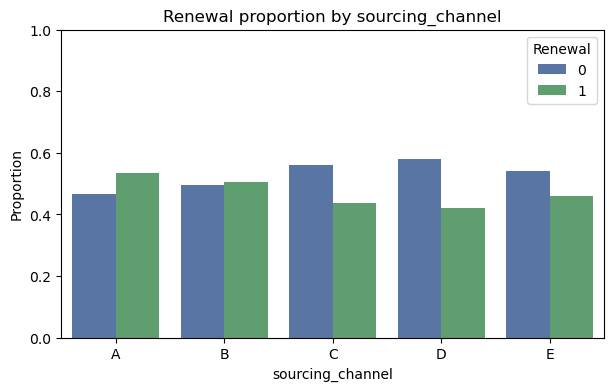

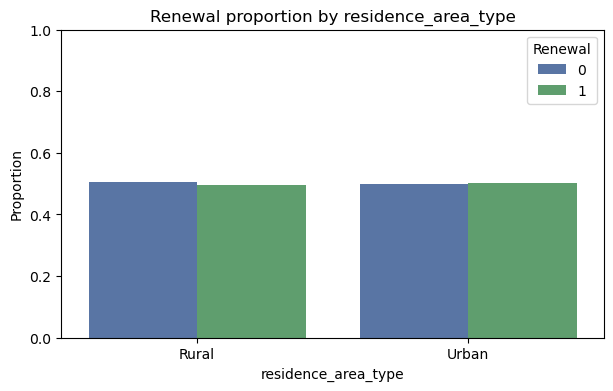

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = ['sourcing_channel', 'residence_area_type']

for col in cat_cols:
    crosstab = pd.crosstab(OG_balanced[col], OG_balanced['renewal'], normalize='index')
    crosstab = crosstab.reset_index().melt(id_vars=col, value_name='Proportion', var_name='Renewal')
    
    plt.figure(figsize=(7,4))
    sns.barplot(x=col, y='Proportion', hue='Renewal', data=crosstab, palette=['#4C72B0', '#55A868'])
    plt.title(f"Renewal proportion by {col}")
    plt.ylabel("Proportion")
    plt.xlabel(col)
    plt.ylim(0,1)
    plt.show()


In [146]:
df_pca = OG.copy()

# Fill numeric NaNs with median
num_cols = df_pca.select_dtypes(include=['int64','float64']).columns
df_pca[num_cols] = df_pca[num_cols].apply(lambda x: x.fillna(x.median()))

# Fill categorical NaNs with "Missing"
cat_cols = df_pca.select_dtypes(include=['object']).columns
df_pca[cat_cols] = df_pca[cat_cols].fillna("Missing")


<Figure size 700x500 with 0 Axes>

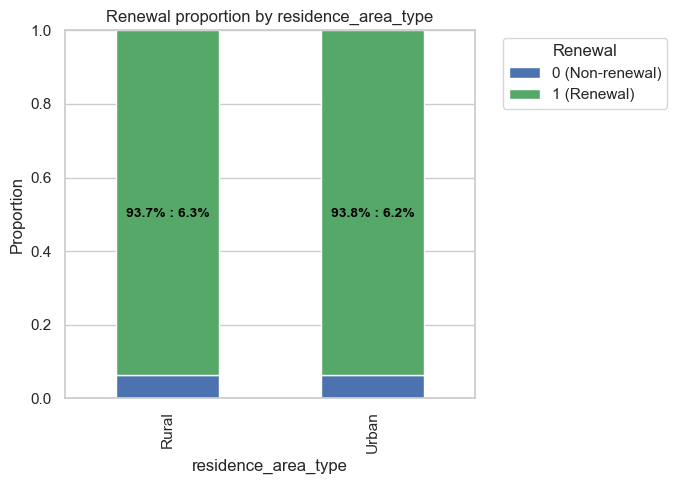

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
# Crosstab of residence vs renewal
ct = pd.crosstab(df_pca['residence_area_type'], df_pca['renewal'], normalize='index')
plt.figure(figsize=(7,5))
ax = ct.plot(kind='bar', stacked=True, figsize=(7,5), color=['#4C72B0', '#55A868'])

plt.title("Renewal proportion by residence_area_type")
plt.xlabel("residence_area_type")
plt.ylabel("Proportion")
plt.ylim(0,1)

# Add ratio annotations
# 💥 FIX APPLIED HERE 💥
for i, (idx, row) in enumerate(ct.iterrows()): # Use enumerate to get the integer position 'i'
    non = row[0] * 100
    ren = row[1] * 100
    # Use the integer position 'i' for the x-coordinate instead of the string 'idx'
    ax.text(x=i, y=0.5, s=f"{ren:.1f}% : {non:.1f}%",
            ha='center', va='center', fontsize=10, color='black', fontweight='bold')

plt.legend(title="Renewal", labels=['0 (Non-renewal)', '1 (Renewal)'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [74]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Copy dataset
df_pca = OG_balanced.copy()

# Separate features and target
X = df_pca.drop(columns=['renewal'])
y = df_pca['renewal']

# Identify numeric and categorical features
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocess: scale numeric, one-hot encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ]
)

X_processed = preprocessor.fit_transform(X)


In [77]:
df_pca = OG.copy()

# Fill numeric NaNs with median
num_cols = df_pca.select_dtypes(include=['int64','float64']).columns
df_pca[num_cols] = df_pca[num_cols].apply(lambda x: x.fillna(x.median()))

# Fill categorical NaNs with "Missing"
cat_cols = df_pca.select_dtypes(include=['object']).columns
df_pca[cat_cols] = df_pca[cat_cols].fillna("Missing")


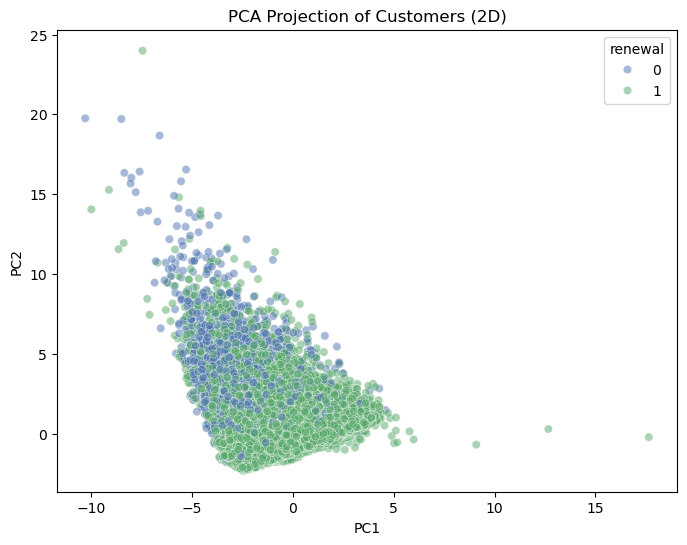

In [79]:
# Separate features and target
X = df_pca.drop(columns=['renewal'])
y = df_pca['renewal']

# Identify numeric and categorical again
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocessor: scale + one-hot
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ]
)

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_processed)

# DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2'])
pca_df['renewal'] = y.values

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='renewal', alpha=0.5, palette=['#4C72B0', '#55A868'])
plt.title("PCA Projection of Customers (2D)")
plt.show()


scikit-learn version: 1.5.1
Numeric cols: ['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'premium', 'age_in_years']
Categorical cols: ['sourcing_channel', 'residence_area_type', 'age_group', 'premium_group']
Processed shape: (79853, 23) dtype: float64
Number of features after preprocessing: 23
First 10 feature names: ['num__id' 'num__perc_premium_paid_by_cash_credit' 'num__age_in_days'
 'num__Income' 'num__Count_3-6_months_late' 'num__Count_6-12_months_late'
 'num__Count_more_than_12_months_late'
 'num__application_underwriting_score' 'num__no_of_premiums_paid'
 'num__premium']
Explained variance ratio (PC1, PC2): [0.1928 0.1238]

Target distribution (counts):
renewal
1    74855
0     4998
Name: count, dtype: int64

Target distribution (percent):
renewal
1    93.74
0     6.26
Name: proportion, dtype: float64


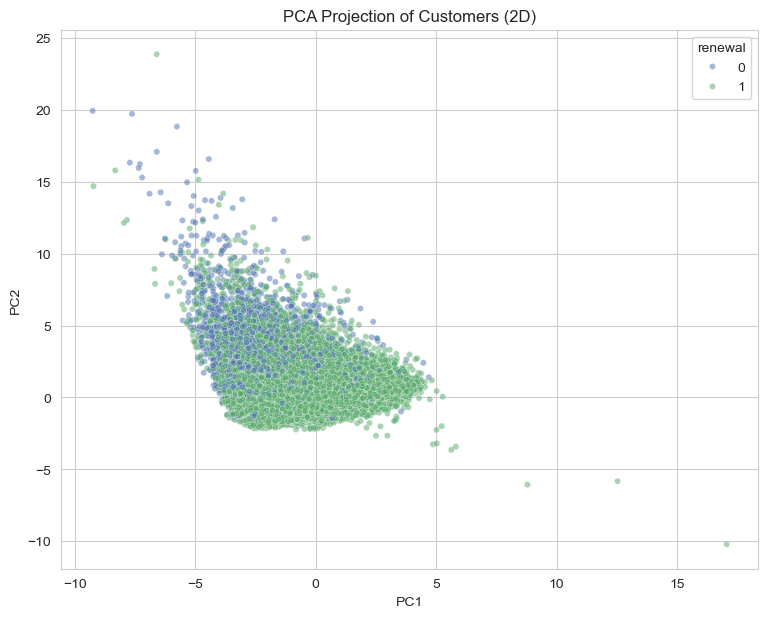

In [80]:
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
palette=['#4C72B0', '#55A868']
print("scikit-learn version:", sklearn.__version__)

# Prepare X, y
X = df_pca.drop(columns=['renewal']).copy()
y = df_pca['renewal'].copy()

# Identify numeric and categorical columns
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()
print("Numeric cols:", num_cols)
print("Categorical cols:", cat_cols)

# Build OneHotEncoder with cross-version support
ohe = None
ohe_kwargs = dict(drop='first', handle_unknown='ignore')
try:
    # try older param name
    ohe = OneHotEncoder(**{**ohe_kwargs, 'sparse': False})
except TypeError:
    # fallback to newer param name
    ohe = OneHotEncoder(**{**ohe_kwargs, 'sparse_output': False})

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', ohe, cat_cols)
    ],
    remainder='drop'
)

# Fit-transform
X_processed = preprocessor.fit_transform(X)
print("Processed shape:", X_processed.shape, "dtype:", X_processed.dtype)

# Optional: get feature names (robust)
try:
    feature_names = preprocessor.get_feature_names_out()
    print("Number of features after preprocessing:", len(feature_names))
    print("First 10 feature names:", feature_names[:10])
except Exception as e:
    print("Couldn't get feature names automatically:", e)
    feature_names = None

# PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_processed)
print("Explained variance ratio (PC1, PC2):", np.round(pca.explained_variance_ratio_, 4))

# Quick checks on target balance
print("\nTarget distribution (counts):")
print(y.value_counts(dropna=False))
print("\nTarget distribution (percent):")
print(y.value_counts(normalize=True).mul(100).round(2))

# DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2'])
pca_df['renewal'] = y.values

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(9,7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='renewal', alpha=0.5, palette=['#4C72B0', '#55A868'], s=20)
plt.title("PCA Projection of Customers (2D)")
plt.show()


In [81]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# PCA with 3 components
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_processed)

# Create DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2','PC3'])
pca_df['renewal'] = y.values


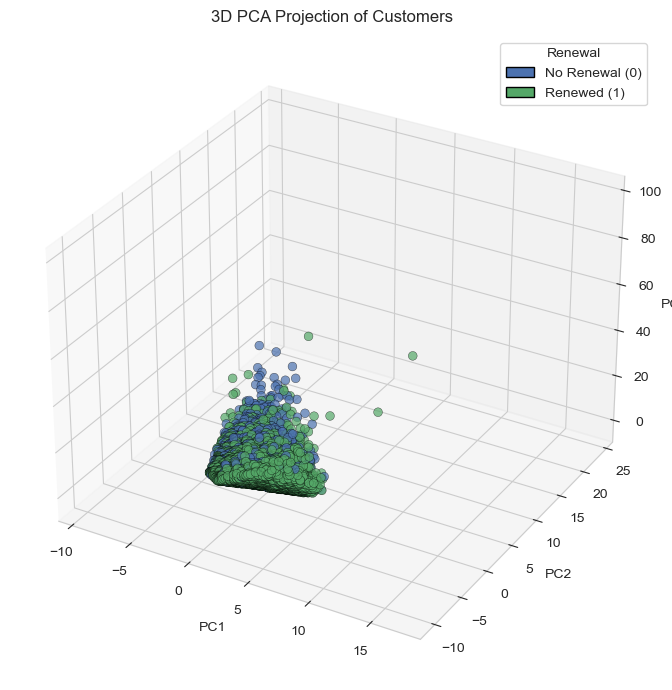

In [82]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # required for 3D projection
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
import pandas as pd

# --- PCA with 3 components ---
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_processed)

# --- Create DataFrame ---
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['renewal'] = y.values  # ensure y aligns and is numeric (0/1)

# --- Define colors and colormap ---
colors = ['#4C72B0', '#55A868']            # class 0 = blue, class 1 = green
cmap = ListedColormap(colors)

# --- Plot 3D scatter ---
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],
    c=pca_df['renewal'], cmap=cmap, alpha=0.7, s=40, edgecolor='k', linewidth=0.3
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Projection of Customers", pad=10)

# --- Create a clean legend with labels matched to colors ---
legend_handles = [Patch(facecolor=colors[0], edgecolor='k', label='No Renewal (0)'),
                  Patch(facecolor=colors[1], edgecolor='k', label='Renewed (1)')]
ax.legend(handles=legend_handles, title='Renewal', loc='upper right')

plt.tight_layout()
plt.show()


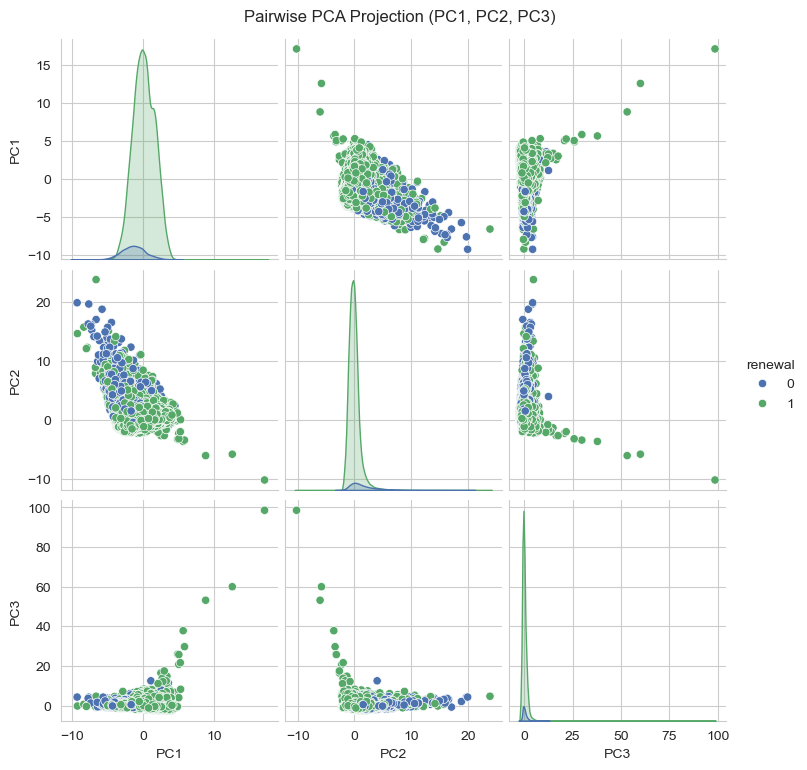

In [84]:
sns.pairplot(pca_df, hue="renewal", vars=["PC1","PC2","PC3"], palette=['#4C72B0', '#55A868'], diag_kind="kde")
plt.suptitle("Pairwise PCA Projection (PC1, PC2, PC3)", y=1.02)
plt.show()


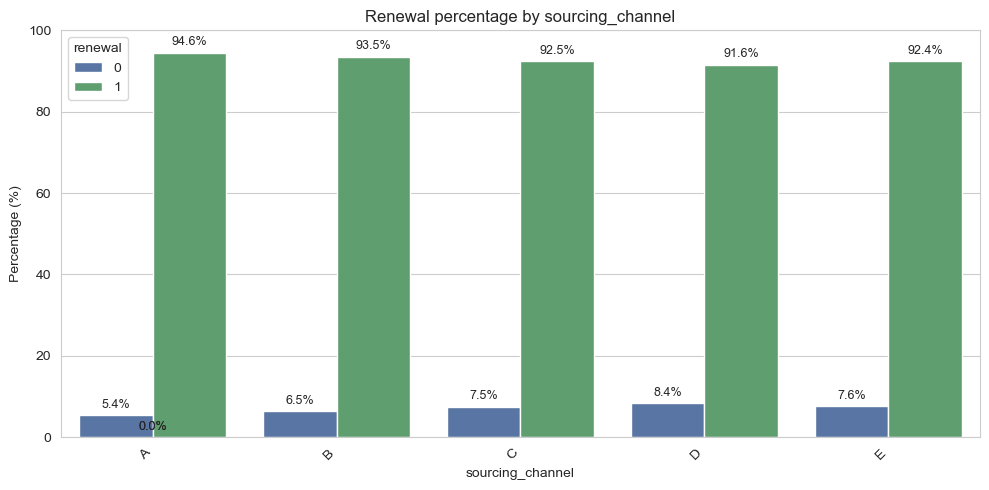

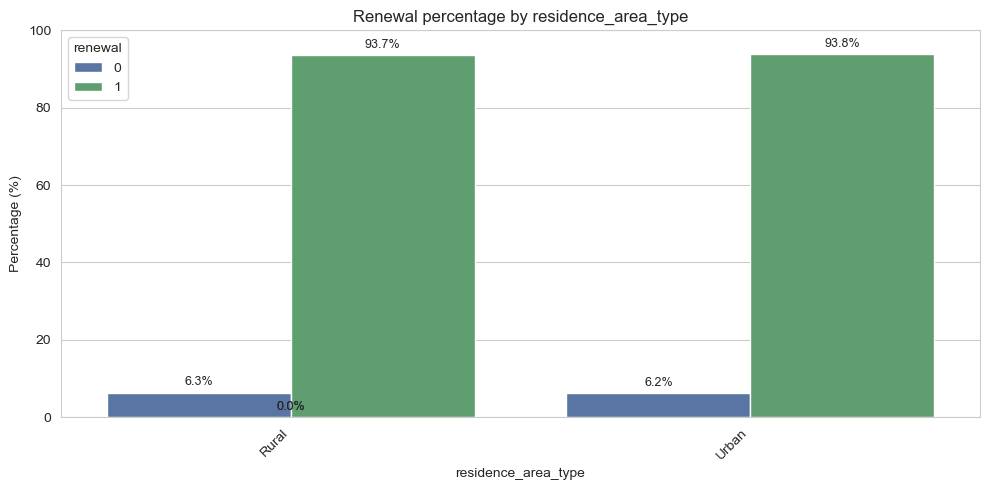

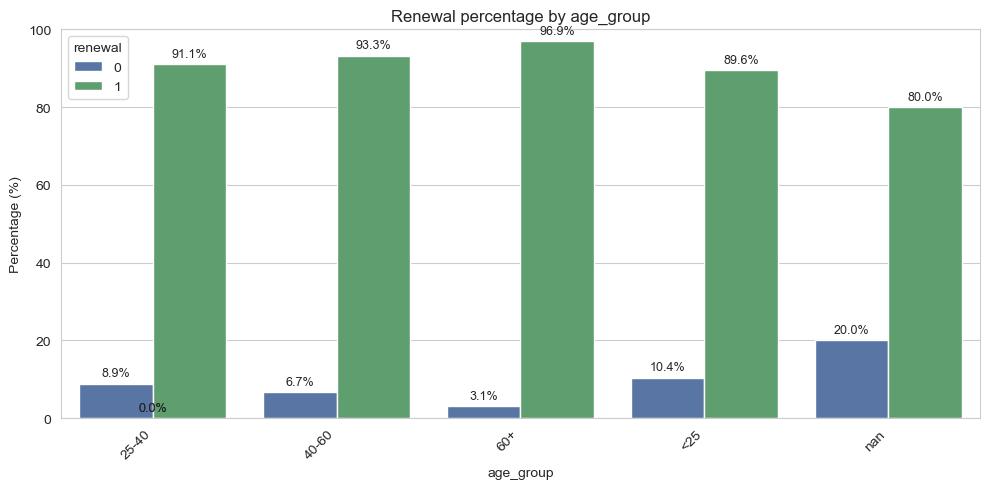

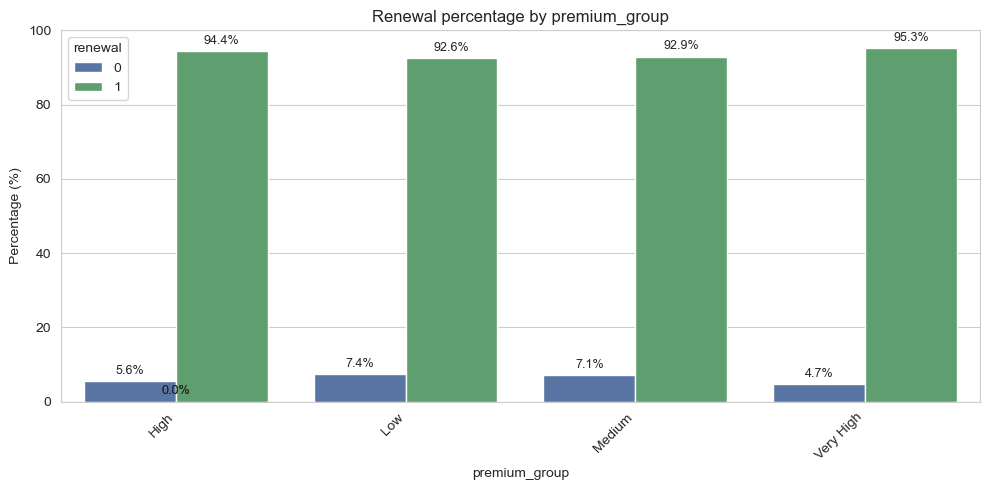

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_cat_vs_target_percent_str(df, target='renewal'):
    cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
    if len(cat_cols) == 0:
        print("No categorical columns found.")
        return

    for col in cat_cols:
        tmp = df[[col, target]].copy()
        # convert to string first so fillna with a new label is always allowed
        tmp[col] = tmp[col].astype(str).fillna("Missing")  

        # Crosstab normalized by row -> percentages
        prop = pd.crosstab(tmp[col], tmp[target], normalize='index') * 100

        prop_melt = prop.reset_index().melt(id_vars=col, var_name=target, value_name='percentage')

        plt.figure(figsize=(10,5))
        ax = sns.barplot(x=col, y='percentage', hue=target, data=prop_melt, palette=['#4C72B0', '#55A868'])

        # labels
        for p in ax.patches:
            height = p.get_height()
            if not np.isnan(height):
                ax.annotate(f"{height:.1f}%", (p.get_x() + p.get_width()/2., height),
                            ha='center', va='bottom', fontsize=9, xytext=(0,3), textcoords='offset points')

        plt.title(f"Renewal percentage by {col}")
        plt.ylabel("Percentage (%)")
        plt.xlabel(col)
        plt.ylim(0, 100)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title=target)
        plt.tight_layout()
        plt.show()

# Run on OG
plot_cat_vs_target_percent_str(OG, target='renewal')


In [88]:
OG_work = OG_clean.copy()
late_cols = [
    'Count_3-6_months_late',
    'Count_6-12_months_late',
    'Count_more_than_12_months_late'
]
OG_work[late_cols] = OG_work[late_cols].fillna(0)

In [89]:
cat_cols = OG_work.select_dtypes(include=['object','category']).columns.tolist()
num_cols = OG_work.select_dtypes(include=['int64','float64']).columns.tolist()


In [90]:
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ohe_array = ohe.fit_transform(OG_work[cat_cols])

In [91]:
ohe_df = pd.DataFrame(
    ohe_array,
    columns=ohe.get_feature_names_out(cat_cols),
    index=OG_work.index
)


In [93]:
OG_encoded = pd.concat([OG_work[num_cols], ohe_df], axis=1)


In [94]:
imputer = KNNImputer(n_neighbors=5)
OG_knn_imputed_array = imputer.fit_transform(OG_encoded)


In [95]:
OG_knn_imputed = pd.DataFrame(
    OG_knn_imputed_array,
    columns=OG_encoded.columns,
    index=OG_encoded.index
)

In [96]:
orig_missing_mask = OG_clean['application_underwriting_score'].isnull()
imputed_values = OG_knn_imputed.loc[orig_missing_mask, 'application_underwriting_score']
print("Number of application_underwriting_score rows imputed:", imputed_values.shape[0])
print(imputed_values.head(10))

Number of application_underwriting_score rows imputed: 2974
18     98.802
26     99.782
39     98.922
60     99.274
61     98.834
76     99.382
77     99.152
84     98.350
140    99.812
145    97.954
Name: application_underwriting_score, dtype: float64


In [97]:
OG_knn_imputed.isna().sum()

perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
premium                             0
renewal                             0
age_in_years                        0
sourcing_channel_B                  0
sourcing_channel_C                  0
sourcing_channel_D                  0
sourcing_channel_E                  0
residence_area_type_Urban           0
age_group_40-60                     0
age_group_60+                       0
age_group_<25                       0
age_group_nan                       0
premium_group_Low                   0
premium_group_Medium                0
premium_group_Very High             0
dtype: int64

In [99]:
OG_imputed = OG_clean.copy()

In [100]:
late_cols = [
    'Count_3-6_months_late',
    'Count_6-12_months_late',
    'Count_more_than_12_months_late'
]
OG_imputed[late_cols] = OG_imputed[late_cols].fillna(0)

# 3) Only impute application_underwriting_score using KNN results we already computed
# Grab the imputed values from OG_knn_imputed
OG_imputed.loc[:, 'application_underwriting_score'] = OG_knn_imputed['application_underwriting_score'].values


In [101]:
OG_imputed

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal,age_in_years,age_group,premium_group
0,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,33,25-40,Low
1,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,59,40-60,Very High
2,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,48,40-60,Low
3,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,42,40-60,High
4,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,86,60+,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79848,0.425,23367,224550,1.0,0.0,0.0,98.70,19,B,Urban,13800,1,64,60+,High
79849,0.704,19356,279150,1.0,0.0,1.0,99.42,12,A,Rural,28500,1,53,40-60,Very High
79850,0.000,23372,305020,0.0,0.0,0.0,98.89,12,A,Rural,9600,1,64,60+,High
79851,0.398,22641,39330,0.0,0.0,0.0,98.68,8,A,Rural,5700,1,62,60+,Medium


In [102]:
OG_imputed = OG_imputed.drop(columns=['age_in_days'])

In [103]:
num_cols = OG_imputed.select_dtypes(include=['int64','float64']).columns
cat_cols = OG_imputed.select_dtypes(include=['object']).columns


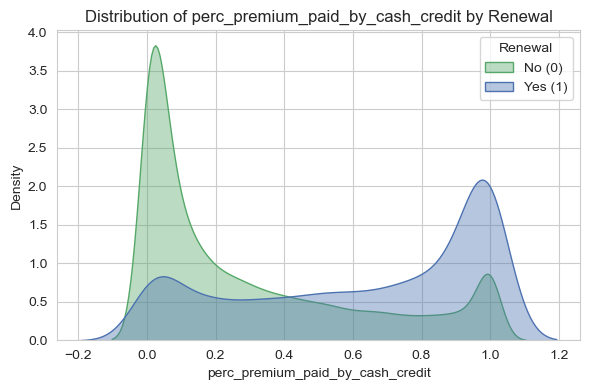

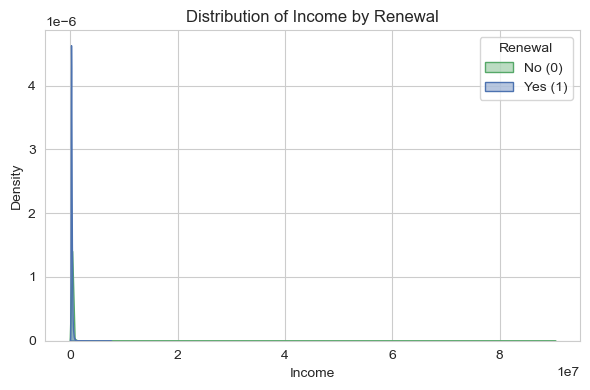

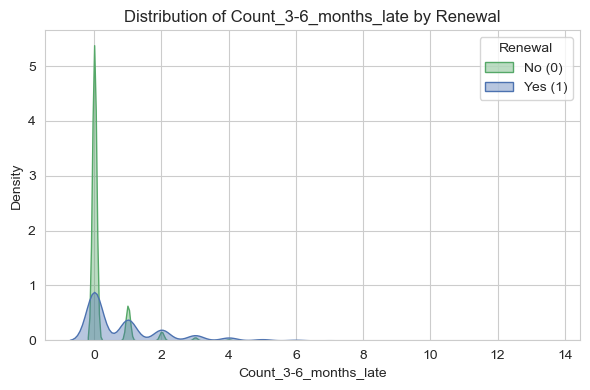

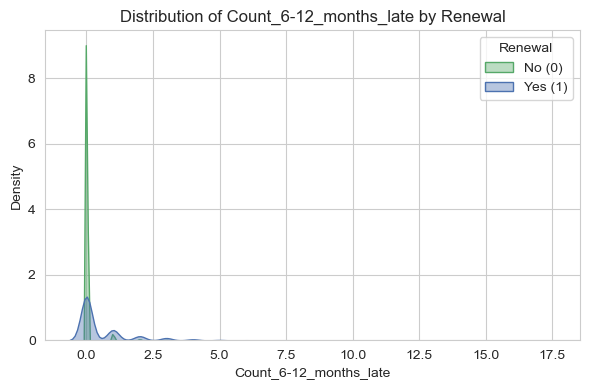

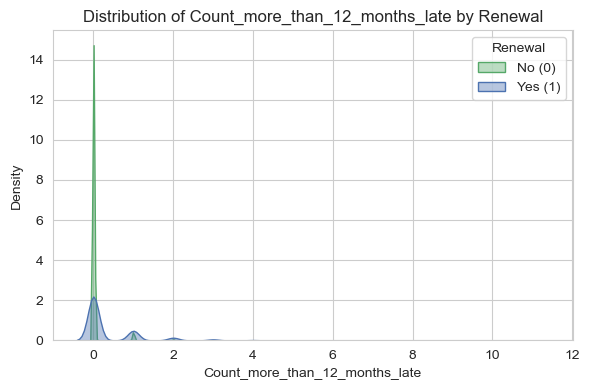

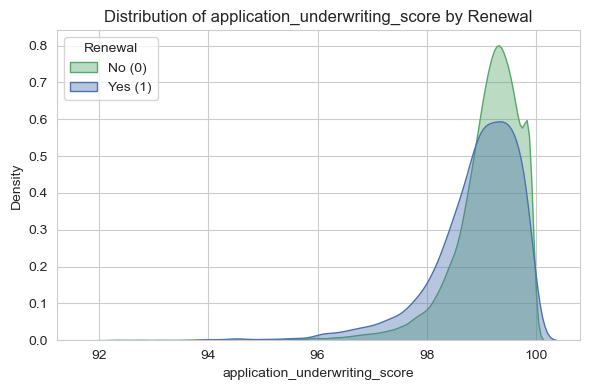

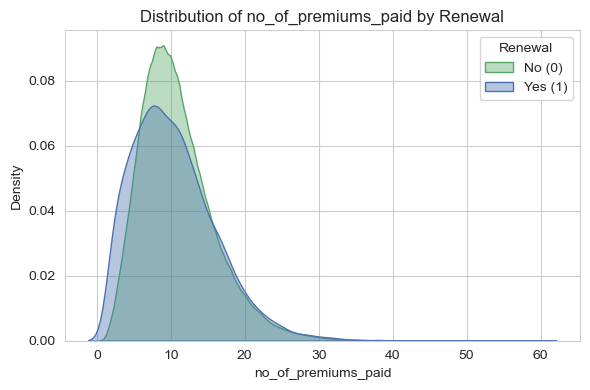

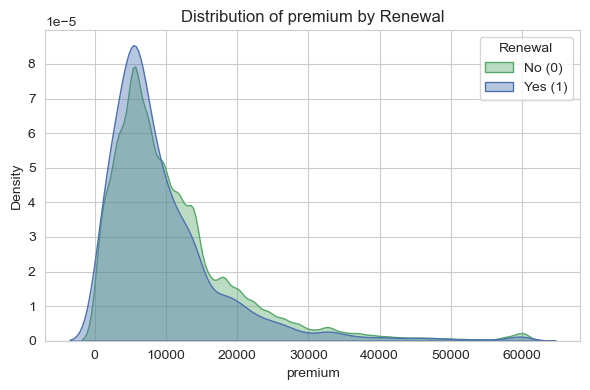

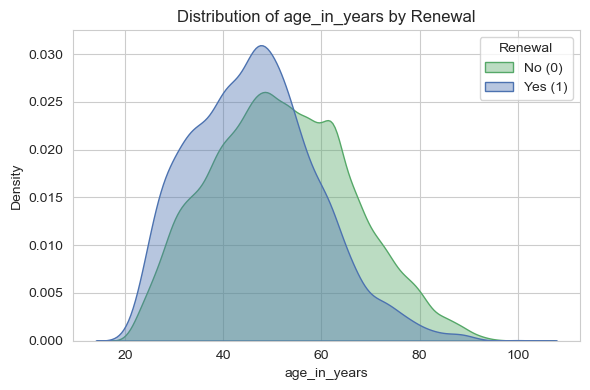

In [104]:

df = OG_imputed.copy()
target = 'renewal'
num_cols = df.select_dtypes(include=['int64','float64']).columns.drop(target)

# Loop through numeric features
for col in num_cols:
    plt.figure(figsize=(6,4))   # ✅ bigger size
    sns.kdeplot(data=df, x=col, hue=target, fill=True, common_norm=False, alpha=0.4, palette=['#4C72B0', '#55A868'])
    plt.title(f"Distribution of {col} by Renewal")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend(title="Renewal", labels=["No (0)", "Yes (1)"])
    plt.tight_layout()
    plt.show()

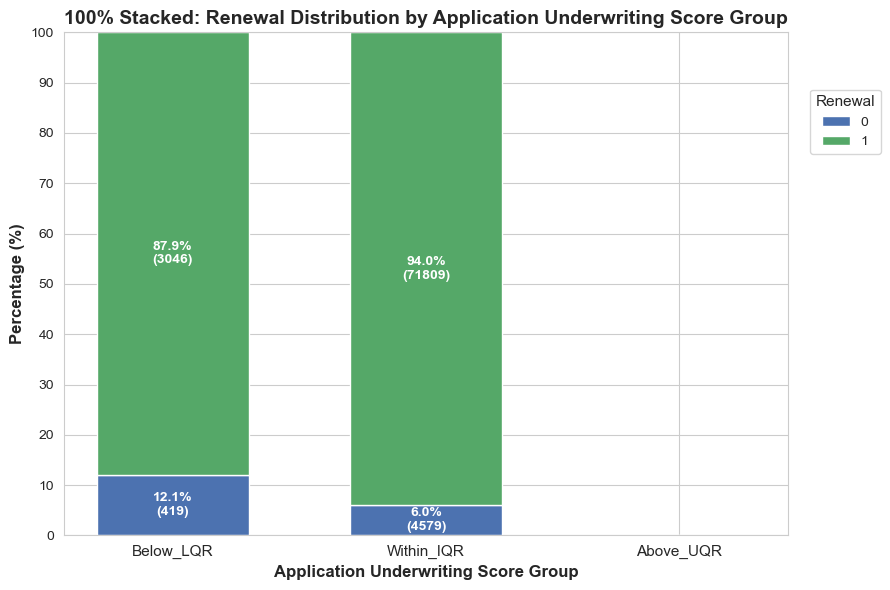

Outlier rows (Below_LQR or Above_UQR): 3465


,application_underwriting_score,renewal
11,97.03,1
31,97.42,1
32,97.44,0
43,92.82,1
127,95.47,1
144,97.56,1
147,96.88,1
185,96.70,1
215,97.57,1
234,97.37,1


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Settings: feature and target ---
feat = 'application_underwriting_score'
target_col = 'renewal'

# Given IQR bounds
lower_bound = 97.72
upper_bound = 100.64

# --- 1) Create group labels based on bounds ---
def score_group(x):
    if pd.isna(x):
        return 'Missing'
    if x < lower_bound:
        return 'Below_LQR'
    elif x > upper_bound:
        return 'Above_UQR'
    else:
        return 'Within_IQR'

df['score_group'] = df[feat].apply(score_group)

# Optionally drop missing group if present
df_plot = df[df['score_group'] != 'Missing'].copy()

# --- 2) Compute counts and percentages per group ---
ct = pd.crosstab(df_plot['score_group'], df_plot[target_col])   # counts
pct = ct.div(ct.sum(axis=1), axis=0) * 100                     # row-wise percentages

# Ensure predictable order of groups
group_order = ['Below_LQR', 'Within_IQR', 'Above_UQR']
ct = ct.reindex(group_order).fillna(0)
pct = pct.reindex(group_order).fillna(0)

# --- 3) Plot 100% stacked bar with percentage + count annotations ---
groups = pct.index.astype(str)
classes = ct.columns.tolist()
# colors = plt.cm.Set2.colors
colors = ['#4C72B0', '#55A868']


fig, ax = plt.subplots(figsize=(9, 6))
bottom = np.zeros(len(groups))

for i, cls in enumerate(classes):
    vals_pct = pct[cls].values
    vals_cnt = ct[cls].values
    bars = ax.bar(groups, vals_pct, bottom=bottom, label=str(cls), color=colors[i % len(colors)], width=0.6)

    # annotate each segment with "xx.x% (count)"
    for bar, pval, cnt, btm in zip(bars, vals_pct, vals_cnt, bottom):
        if pval > 1:  # annotate only segments > 1% to reduce clutter
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                btm + pval / 2,
                f'{pval:.1f}%\n({int(cnt)})',
                ha='center', va='center',
                fontsize=10, fontweight='bold', color='white'
            )
    bottom += vals_pct

# Aesthetics
ax.set_xlabel('Application Underwriting Score Group', fontsize=12, fontweight='bold')
ax.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax.set_title('100% Stacked: Renewal Distribution by Application Underwriting Score Group', fontsize=14, fontweight='bold')
ax.set_ylim(0, 100)
ax.set_yticks(np.arange(0, 101, 10))
plt.xticks(fontsize=11)
ax.legend(title='Renewal', bbox_to_anchor=(1.02, 0.9), loc='upper left', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()

# --- 4) Optional: expose outlier rows (Below_LQR and Above_UQR) for inspection ---
df_score_outliers = df_plot[df_plot['score_group'].isin(['Below_LQR', 'Above_UQR'])].copy()
print(f"Outlier rows (Below_LQR or Above_UQR): {len(df_score_outliers)}")
display(df_score_outliers[[feat, target_col]].head(10))


Found 527 distinct application_underwriting_score values below 97.72.


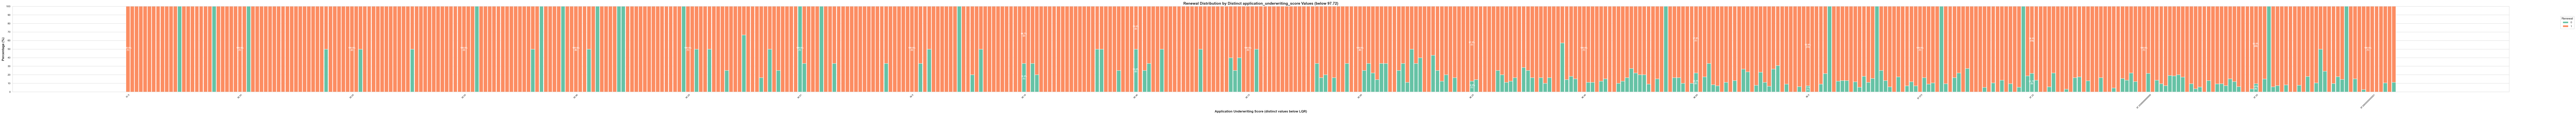

renewal,0,1,0_pct,1_pct
application_underwriting_score,,,,
91.90,0,1,0.0,100.0
91.96,0,3,0.0,100.0
91.98,0,1,0.0,100.0
92.03,0,2,0.0,100.0
92.07,0,1,0.0,100.0
92.13,0,2,0.0,100.0
92.15,0,1,0.0,100.0
92.16,0,1,0.0,100.0
92.17,0,1,0.0,100.0


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings
feat = 'application_underwriting_score'
target_col = 'renewal'
lower_bound = 97.72   # given LQR bound

# 1) Get distinct score values below the lower bound, sorted ascending (or descending as desired)
distinct_below = (
    df.loc[df[feat] < lower_bound, feat]
      .dropna()
      .drop_duplicates()
      .sort_values()   # change to descending() if you prefer highest-first
)

n_vals = len(distinct_below)
print(f"Found {n_vals} distinct {feat} values below {lower_bound}.")

if n_vals == 0:
    raise ValueError(f"No distinct {feat} values found below {lower_bound}.")

# 2) Filter df to only rows whose score is one of these distinct values
df_below = df[df[feat].isin(distinct_below)].copy()

# 3) Build contingency table (counts) and percentage table (row-wise) indexed by score value
ct = pd.crosstab(df_below[feat], df_below[target_col]).sort_index()
pct = ct.div(ct.sum(axis=1), axis=0) * 100

# 4) Prepare plotting order (string labels for x-axis)
scores = pct.index.astype(str)   # x-axis labels (stringified scores)
classes = ct.columns.tolist()
colors = plt.cm.Set2.colors

# 5) Plot 100% stacked bars (one bar per distinct score)
fig, ax = plt.subplots(figsize=(max(10, n_vals*0.25), 6))  # width scales with number of distinct values
bottom = np.zeros(len(scores))

for i, cls in enumerate(classes):
    vals_pct = pct[cls].values
    vals_cnt = ct[cls].values
    bars = ax.bar(range(len(scores)), vals_pct, bottom=bottom, label=str(cls),
                  color=colors[i % len(colors)], width=0.9)
    
    # Annotate (choose cadence to avoid clutter)
    annotate_every = max(1, len(scores)//20)   # annotate ~20 labels across plot
    for j, (bar, pval, cnt, btm) in enumerate(zip(bars, vals_pct, vals_cnt, bottom)):
        if (j % annotate_every == 0) and (pval > 2):   # annotate only some bars and segments > 2%
            ax.text(
                bar.get_x() + bar.get_width()/2,
                btm + pval/2,
                f'{pval:.1f}%\n({int(cnt)})',
                ha='center', va='center', fontsize=8, fontweight='bold', color='white'
            )
    bottom += vals_pct

# 6) Aesthetics
ax.set_xlabel('Application Underwriting Score (distinct values below LQR)', fontsize=12, fontweight='bold')
ax.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax.set_title(f'Renewal Distribution by Distinct {feat} Values (below {lower_bound})', fontsize=14, fontweight='bold')
ax.set_ylim(0, 100)
ax.set_yticks(np.arange(0, 101, 10))

# X-axis ticks: show a subset for readability
step = max(1, len(scores)//20)
xticks = np.arange(0, len(scores), step)
ax.set_xticks(xticks)
ax.set_xticklabels([scores[i] for i in xticks], rotation=45, fontsize=8)

# Legend and layout
ax.legend(title='Renewal', bbox_to_anchor=(1.02, 0.9), loc='upper left', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()

# 7) Optional: print a small summary table for the first few distinct scores
summary = pd.concat([ct, pct.add_suffix('_pct')], axis=1)
display(summary.sort_index().head(40))   # show up to first 40 rows for quick inspection


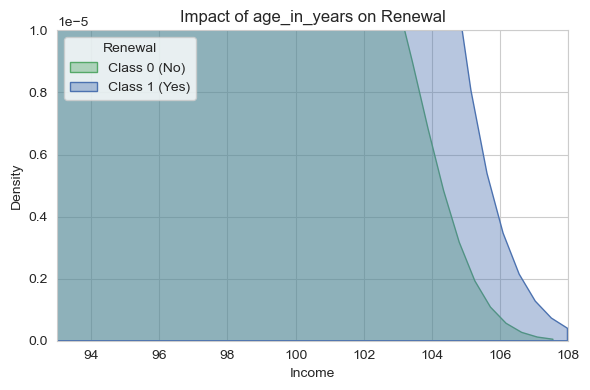

In [107]:
plt.figure(figsize=(6,4))
sns.kdeplot(
    data=df,
    x='age_in_years',
    hue=target,
    fill=True,
    common_norm=False,
    alpha=0.4,
    palette=['#4C72B0', '#55A868']
)
plt.title('Impact of age_in_years on Renewal')
plt.xlabel('Income')
plt.ylabel('Density')
plt.xlim(93, 108)   # ✅ limit x-axis
plt.ylim(0, 0.00001)     # optional, if you want to zoom in vertically too
plt.legend(title='Renewal', labels=['Class 0 (No)', 'Class 1 (Yes)'])
plt.tight_layout()
plt.show()

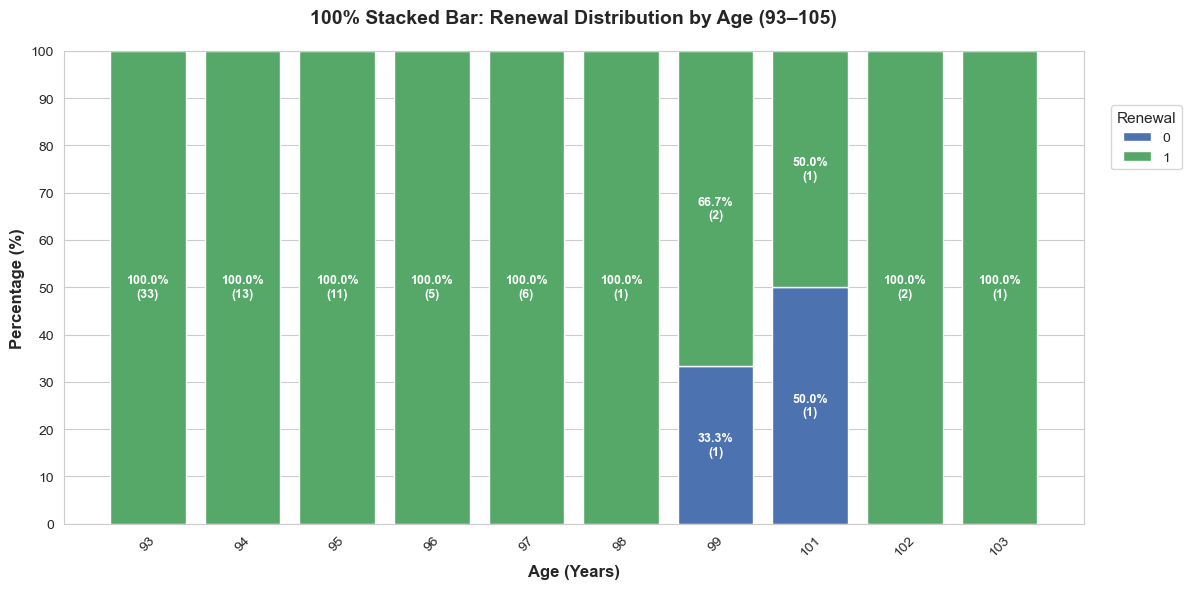

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter for the desired age range
df_age = df[(df['age_in_years'] >= 93) & (df['age_in_years'] <= 105)]

# Contingency table of counts
ct = pd.crosstab(df_age['age_in_years'], df_age[target])

# Percentage table (row-wise)
pct = ct.div(ct.sum(axis=1), axis=0) * 100

# Plot setup
ages = pct.index.astype(str)
classes = ct.columns  # same columns for counts & percentages
# colors = plt.cm.Set2.colors
colors = ['#4C72B0', '#55A868']

fig, ax = plt.subplots(figsize=(12, 6))
bottom = np.zeros(len(ages))

# Create stacked bars
for i, cls in enumerate(classes):
    values_pct = pct[cls].values       # percentage values
    values_count = ct[cls].values      # count values
    bars = ax.bar(ages, values_pct, bottom=bottom, label=str(cls), color=colors[i])

    # Add annotation: percentage + count
    for bar, pct_val, cnt_val, btm in zip(bars, values_pct, values_count, bottom):
        if pct_val > 2:  # annotate only larger segments to avoid clutter
            ax.text(
                bar.get_x() + bar.get_width()/2,
                btm + pct_val/2,
                f'{pct_val:.1f}%\n({cnt_val})',
                ha='center', va='center',
                fontsize=9, fontweight='bold', color='white'
            )
    bottom += values_pct

# Format axes
ax.set_xlabel('Age (Years)', fontsize=12, fontweight='bold')
ax.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax.set_title('100% Stacked Bar: Renewal Distribution by Age (93–105)', fontsize=14, fontweight='bold', pad=20)

# Y-axis limits and ticks
ax.set_ylim(0, 100)
ax.set_yticks(np.arange(0, 101, 10))

# Improve readability
plt.xticks(rotation=45, fontsize=10)
ax.legend(title='Renewal', bbox_to_anchor=(1.02, 0.9), loc='upper left', fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()


Outliers detected: 3428 rows


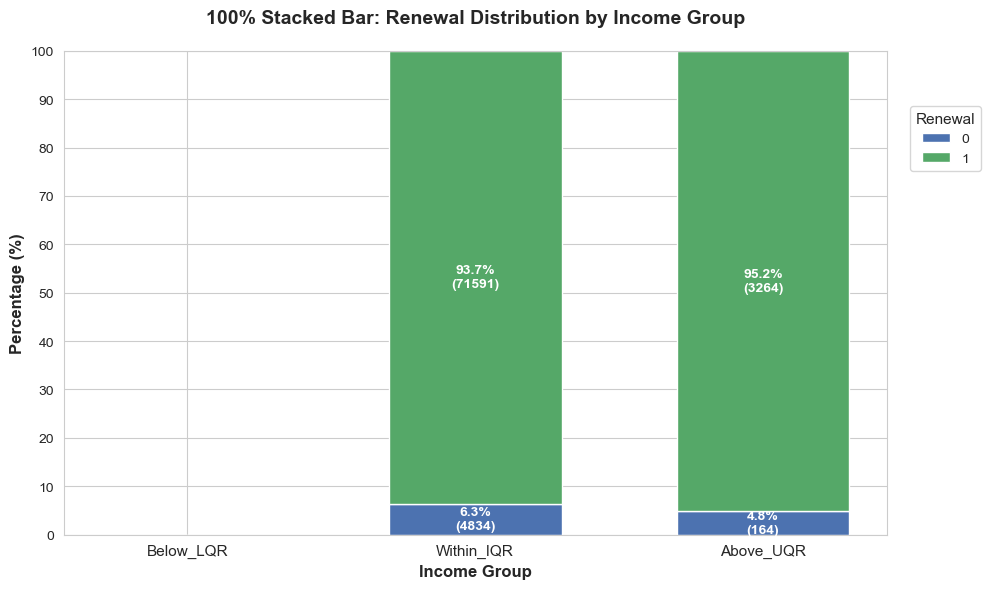


Sample Outliers:


,Income,renewal
69,494050,1
92,900030,1
131,509070,1
141,510070,1
163,495070,1
175,512170,1
202,582110,1
211,552150,1
212,525150,1
218,514540,1



Distinct Outlier Values: 2233


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Feature and target ---
income_col = 'Income'
target_col = 'renewal'

# --- Use your given IQR bounds ---
lower_bound = -108110
upper_bound = 468210

# --- Step 1: Categorize each record ---
def income_group(value):
    if value < lower_bound:
        return 'Below_LQR'
    elif value > upper_bound:
        return 'Above_UQR'
    else:
        return 'Within_IQR'

df['income_group'] = df[income_col].apply(income_group)

# --- Step 2: Identify outliers ---
df_income_outliers = df[(df[income_col] < lower_bound) | (df[income_col] > upper_bound)].copy()
print(f"Outliers detected: {len(df_income_outliers)} rows")

# --- Step 3: Build count and percentage tables ---
ct = pd.crosstab(df['income_group'], df[target_col])     # counts
pct = ct.div(ct.sum(axis=1), axis=0) * 100               # convert to percentage

# Ensure proper order for plotting
group_order = ['Below_LQR', 'Within_IQR', 'Above_UQR']
pct = pct.reindex(group_order).fillna(0)
ct = ct.reindex(group_order).fillna(0)

# --- Step 4: Plot (100% stacked bar) ---
groups = pct.index.astype(str)
classes = ct.columns
colors = ['#4C72B0', '#55A868']

fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(len(groups))

for i, cls in enumerate(classes):
    vals_pct = pct[cls].values
    vals_cnt = ct[cls].values
    bars = ax.bar(groups, vals_pct, bottom=bottom, label=str(cls), color=colors[i % len(colors)], width=0.6)
    
    # Annotate each segment with percentage + count
    for bar, pval, cnt, btm in zip(bars, vals_pct, vals_cnt, bottom):
        if pval > 1:  # avoid clutter for small segments
            ax.text(
                bar.get_x() + bar.get_width()/2,
                btm + pval/2,
                f'{pval:.1f}%\n({int(cnt)})',
                ha='center', va='center',
                fontsize=10, fontweight='bold', color='white'
            )
    bottom += vals_pct

# --- Step 5: Chart aesthetics ---
ax.set_xlabel('Income Group', fontsize=12, fontweight='bold')
ax.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax.set_title('100% Stacked Bar: Renewal Distribution by Income Group', fontsize=14, fontweight='bold', pad=20)
ax.set_ylim(0, 100)
ax.set_yticks(np.arange(0, 101, 10))
plt.xticks(fontsize=11)
ax.legend(title='Renewal', bbox_to_anchor=(1.02, 0.9), loc='upper left', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()

# --- Step 6: Optional: Inspect Outliers ---
print("\nSample Outliers:")
display(df_income_outliers[[income_col, target_col]].head(10))
print(f"\nDistinct Outlier Values: {df_income_outliers[income_col].nunique()}")


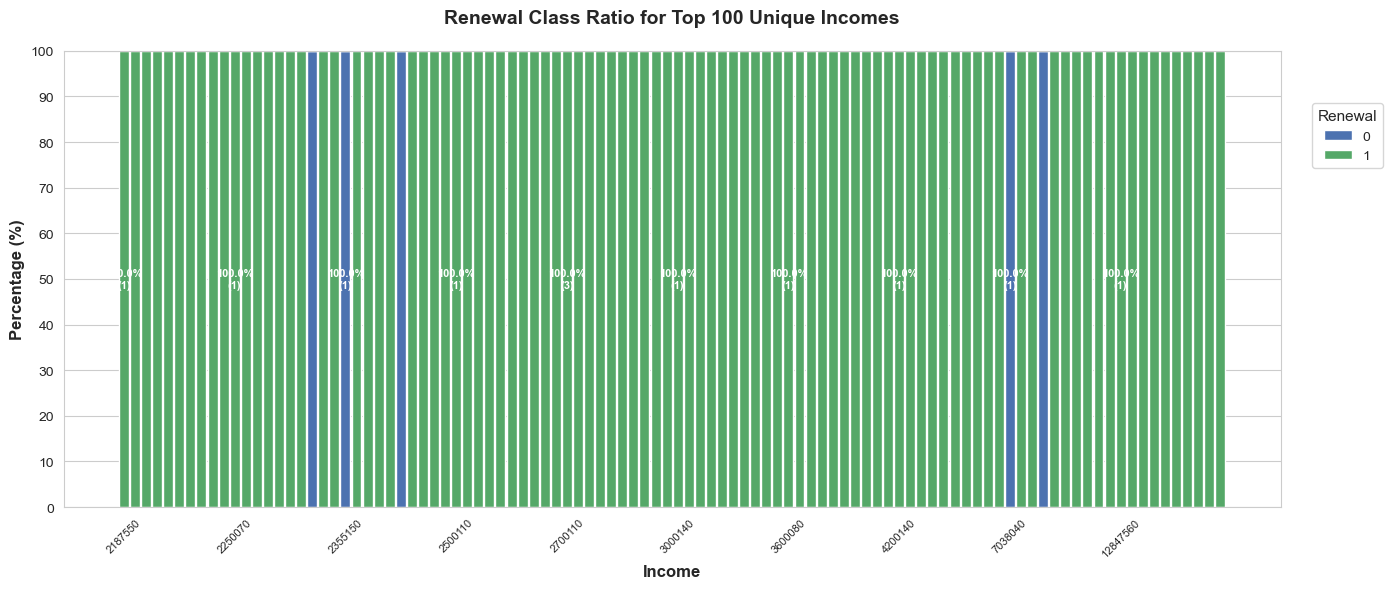

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Feature and target ---
income_col = 'Income'
target_col = 'renewal'

# Step 1️⃣: Select top 100 unique incomes
top_100_incomes = (
    df[income_col]
    .dropna()
    .drop_duplicates()
    .sort_values(ascending=False)  # ✅ highest values
    .head(100)
)

# Step 2️⃣: Filter dataset to those top 100 income records
df_top_income = df[df[income_col].isin(top_100_incomes)].copy()

# Step 3️⃣: Create class count and percentage tables
ct = pd.crosstab(df_top_income[income_col], df_top_income[target_col])
pct = ct.div(ct.sum(axis=1), axis=0) * 100  # percentage per income value

# Step 4️⃣: Plot 100% stacked bar chart
incomes = pct.index.astype(str)
classes = ct.columns
# colors = plt.cm.Set2.colors
colors = ['#4C72B0', '#55A868']

fig, ax = plt.subplots(figsize=(14, 6))
bottom = np.zeros(len(incomes))

for i, cls in enumerate(classes):
    vals_pct = pct[cls].values
    vals_cnt = ct[cls].values
    bars = ax.bar(incomes, vals_pct, bottom=bottom, label=str(cls),
                  color=colors[i % len(colors)], width=0.9)
    
    # annotate occasionally (every 10th income) for clarity
    for j, (bar, pval, cnt, btm) in enumerate(zip(bars, vals_pct, vals_cnt, bottom)):
        if j % 10 == 0 and pval > 3:
            ax.text(
                bar.get_x() + bar.get_width()/2,
                btm + pval/2,
                f'{pval:.1f}%\n({int(cnt)})',
                ha='center', va='center',
                fontsize=8, fontweight='bold', color='white'
            )
    bottom += vals_pct

# Step 5️⃣: Aesthetic tweaks
ax.set_title('Renewal Class Ratio for Top 100 Unique Incomes', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Income', fontsize=12, fontweight='bold')
ax.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax.set_ylim(0, 100)
ax.set_yticks(np.arange(0, 101, 10))

# show fewer x-ticks for readability
step = max(1, len(incomes)//10)
plt.xticks(ticks=np.arange(0, len(incomes), step),
           labels=incomes[::step], rotation=45, fontsize=8)

ax.legend(title='Renewal', bbox_to_anchor=(1.02, 0.9), loc='upper left',
          fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()


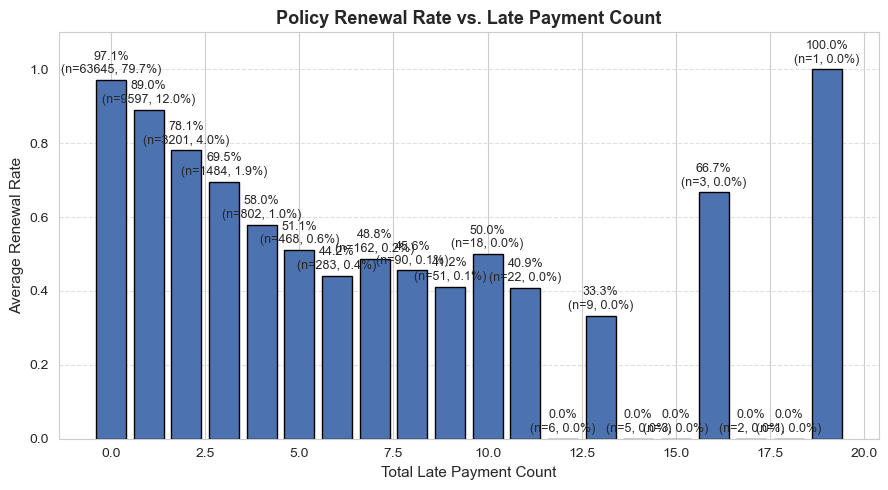

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# palette
colors = ['#4C72B0', '#55A868']
green = colors[0]  # use the green from your palette

# Prepare data (same as before)
df['total_late_payments'] = (
    df['Count_3-6_months_late'] +
    df['Count_6-12_months_late'] +
    df['Count_more_than_12_months_late']
)

summary = (
    df.groupby('total_late_payments')
      .agg(
          renewal_rate=('renewal', 'mean'),
          record_count=('renewal', 'count')
      )
      .reset_index()
)

summary['record_pct'] = summary['record_count'] / summary['record_count'].sum() * 100

# Plot using the green from palette
plt.figure(figsize=(9,5))
bars = plt.bar(summary['total_late_payments'], summary['renewal_rate'],
               color=green, edgecolor='black')

plt.xlabel('Total Late Payment Count', fontsize=11)
plt.ylabel('Average Renewal Rate', fontsize=11)
plt.title('Policy Renewal Rate vs. Late Payment Count', fontsize=13, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate bars with renewal rate (%) and record count
for bar, rate, n, pct in zip(bars, summary['renewal_rate'],
                             summary['record_count'], summary['record_pct']):
    plt.text(bar.get_x() + bar.get_width()/2, rate + 0.01,
             f"{rate*100:.1f}%\n(n={n}, {pct:.1f}%)",
             ha='center', va='bottom', fontsize=9)

plt.ylim(0, 1.1 * summary['renewal_rate'].max())
plt.tight_layout()
plt.show()


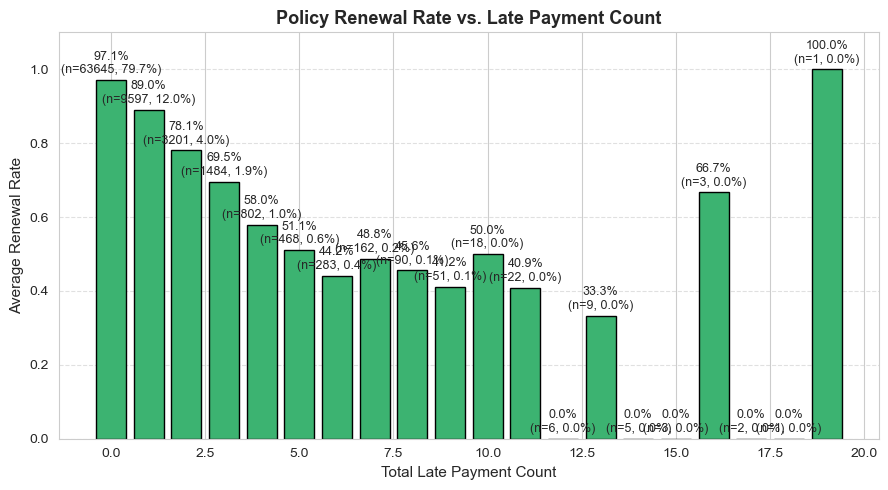

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is df and has the columns below:
# 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'renewal'

# Step 1: Combine late payment features into one total count
df['total_late_payments'] = (
    df['Count_3-6_months_late'] +
    df['Count_6-12_months_late'] +
    df['Count_more_than_12_months_late']
)

# Step 2: Group by late payment count
summary = (
    df.groupby('total_late_payments')
      .agg(
          renewal_rate=('renewal', 'mean'),
          record_count=('renewal', 'count')
      )
      .reset_index()
)

# Step 3: Compute percentage of total records
summary['record_pct'] = summary['record_count'] / summary['record_count'].sum() * 100

# Step 4: Plot bar chart
plt.figure(figsize=(9,5))
bars = plt.bar(summary['total_late_payments'], summary['renewal_rate'],
               color='mediumseagreen', edgecolor='black')

plt.xlabel('Total Late Payment Count', fontsize=11)
plt.ylabel('Average Renewal Rate', fontsize=11)
plt.title('Policy Renewal Rate vs. Late Payment Count', fontsize=13, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Step 5: Annotate bars with renewal rate (%) and record count
for bar, rate, n, pct in zip(bars, summary['renewal_rate'],
                             summary['record_count'], summary['record_pct']):
    plt.text(bar.get_x() + bar.get_width()/2, rate + 0.01,
             f"{rate*100:.1f}%\n(n={n}, {pct:.1f}%)",
             ha='center', va='bottom', fontsize=9)

plt.ylim(0, 1.1 * summary['renewal_rate'].max())
plt.tight_layout()
plt.show()


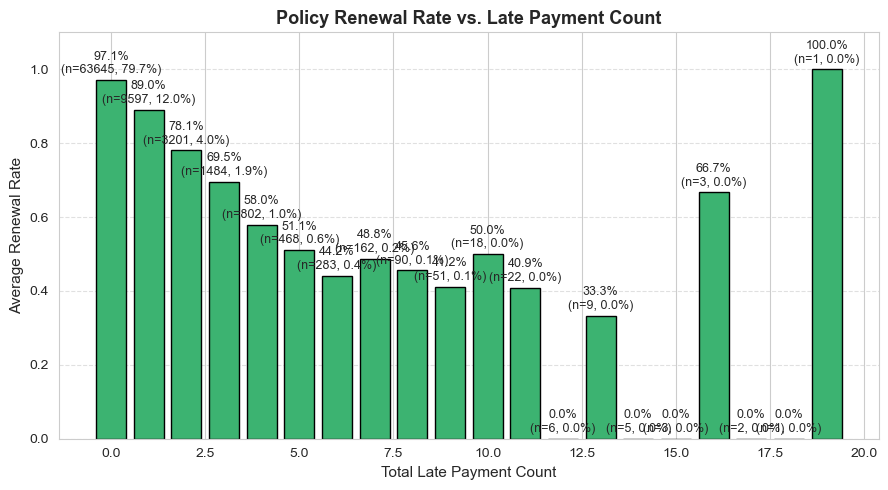

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is df and has the columns below:
# 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'renewal'

# Step 1: Combine late payment features into one total count
df['total_late_payments'] = (
    df['Count_3-6_months_late'] +
    df['Count_6-12_months_late'] +
    df['Count_more_than_12_months_late']
)

# Step 2: Group by late payment count
summary = (
    df.groupby('total_late_payments')
      .agg(
          renewal_rate=('renewal', 'mean'),
          record_count=('renewal', 'count')
      )
      .reset_index()
)

# Step 3: Compute percentage of total records
summary['record_pct'] = summary['record_count'] / summary['record_count'].sum() * 100

# Step 4: Plot bar chart
plt.figure(figsize=(9,5))
bars = plt.bar(summary['total_late_payments'], summary['renewal_rate'],
               color='mediumseagreen', edgecolor='black')

plt.xlabel('Total Late Payment Count', fontsize=11)
plt.ylabel('Average Renewal Rate', fontsize=11)
plt.title('Policy Renewal Rate vs. Late Payment Count', fontsize=13, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Step 5: Annotate bars with renewal rate (%) and record count
for bar, rate, n, pct in zip(bars, summary['renewal_rate'],
                             summary['record_count'], summary['record_pct']):
    plt.text(bar.get_x() + bar.get_width()/2, rate + 0.01,
             f"{rate*100:.1f}%\n(n={n}, {pct:.1f}%)",
             ha='center', va='bottom', fontsize=9)

plt.ylim(0, 1.1 * summary['renewal_rate'].max())
plt.tight_layout()
plt.show()


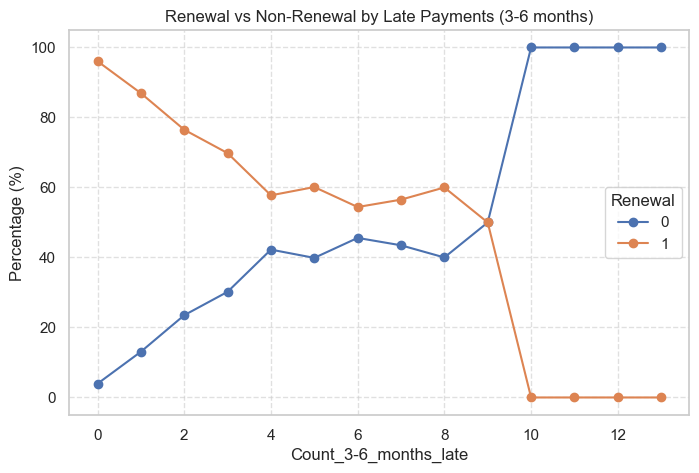

In [155]:
ct3_6 = pd.crosstab(
    OG["Count_3-6_months_late"], 
    OG["renewal"], 
    normalize="index"
) * 100   # convert to %

# Plot as line graph
ct3_6.plot(kind="line", marker="o", figsize=(8,5))
plt.xlabel("Count_3-6_months_late")
plt.ylabel("Percentage (%)")
plt.title("Renewal vs Non-Renewal by Late Payments (3-6 months)")
plt.legend(title="Renewal")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

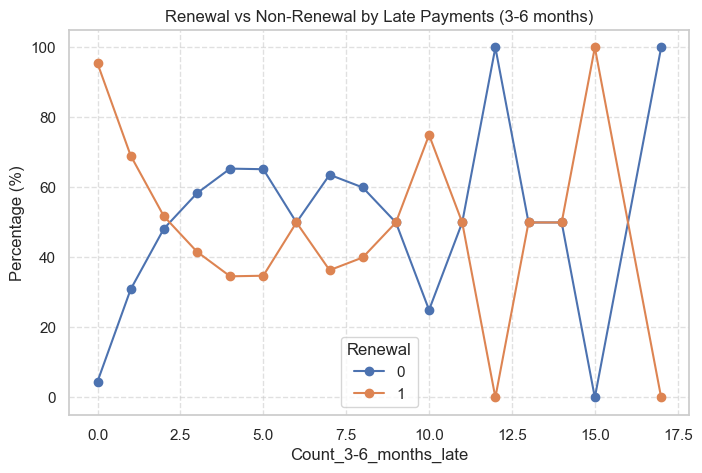

In [157]:
ct6_12 = pd.crosstab(
    OG["Count_6-12_months_late"], 
    OG["renewal"], 
    normalize="index"
) * 100   # convert to %

# Plot as line graph
ct6_12.plot(kind="line", marker="o", figsize=(8,5))
plt.xlabel("Count_3-6_months_late")
plt.ylabel("Percentage (%)")
plt.title("Renewal vs Non-Renewal by Late Payments (3-6 months)")
plt.legend(title="Renewal")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

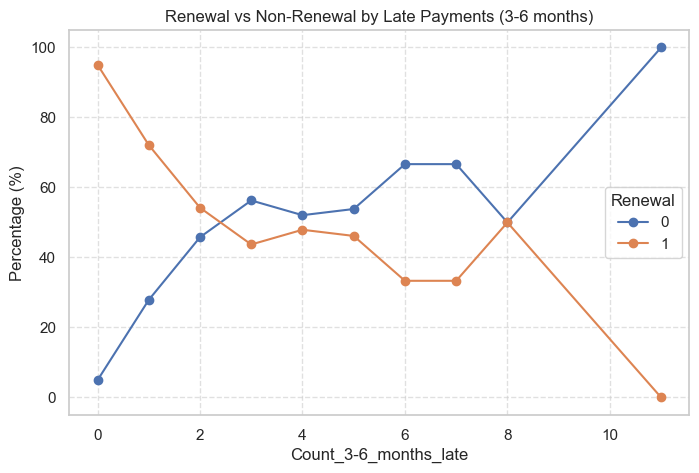

In [159]:
ct12plus = pd.crosstab(
    OG["Count_more_than_12_months_late"], 
    OG["renewal"], 
    normalize="index"
) * 100   # convert to %

# Plot as line graph
ct12plus.plot(kind="line", marker="o", figsize=(8,5))
plt.xlabel("Count_3-6_months_late")
plt.ylabel("Percentage (%)")
plt.title("Renewal vs Non-Renewal by Late Payments (3-6 months)")
plt.legend(title="Renewal")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [161]:
OG['Count_3-6_months_late'].value_counts(dropna=False)

Count_3-6_months_late
0.0     66801
1.0      8826
2.0      2519
3.0       954
4.0       374
5.0       168
NaN        97
6.0        68
7.0        23
8.0        15
9.0         4
13.0        1
12.0        1
11.0        1
10.0        1
Name: count, dtype: int64

In [163]:
OG['Count_6-12_months_late'].value_counts(dropna=False)

Count_6-12_months_late
0.0     75831
1.0      2680
2.0       693
3.0       317
4.0       130
NaN        97
5.0        46
6.0        26
7.0        11
8.0         5
10.0        4
9.0         4
11.0        2
14.0        2
13.0        2
17.0        1
15.0        1
12.0        1
Name: count, dtype: int64

In [165]:
OG['Count_more_than_12_months_late'].value_counts(dropna=False)

Count_more_than_12_months_late
0.0     76038
1.0      2996
2.0       498
3.0       151
NaN        97
4.0        48
5.0        13
6.0         6
7.0         3
8.0         2
11.0        1
Name: count, dtype: int64

In [167]:
OG['application_underwriting_score'].value_counts(dropna=False)

application_underwriting_score
NaN      2974
99.89    1972
99.88    1343
99.87     856
99.86     693
         ... 
94.07       1
92.71       1
92.50       1
92.85       1
93.57       1
Name: count, Length: 673, dtype: int64

In [114]:
# Plotting-only preprocessing: log1p on skewed features -> StandardScaler
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def build_viz_scaled_df(df, target='renewal', skew_thresh=1.0, sample_n=None):
    """
    Returns a DataFrame safe for plotting:
      - makes a copy of df
      - detects numeric cols (excluding target)
      - applies log1p to cols with abs(skew) > skew_thresh (safe shift if negatives)
      - standardizes all numeric cols (mean=0, std=1)
      - keeps categorical cols and target unchanged
    Also prints which columns were log-transformed.
    """
    df = df.copy()
    # numeric columns excluding target
    num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
    if target in num_cols:
        num_cols.remove(target)
    cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
    
    # compute skewness (ignore NaNs)
    skewness = df[num_cols].skew(skipna=True)
    skewed = skewness[skewness.abs() > skew_thresh].index.tolist()
    not_skewed = [c for c in num_cols if c not in skewed]
    
    print("Numeric cols:", num_cols)
    print("Skewed cols (will apply log1p):", skewed)
    print("Non-skewed numeric cols (no log):", not_skewed)
    
    # safe log1p transform for skewed cols (handles zeros and possible negatives)
    def safe_log1p(series):
        arr = series.to_numpy(dtype=float)
        minv = np.nanmin(arr)
        if np.isfinite(minv) and minv < 0:
            shift = -(minv) + 1e-6
            arr = arr + shift
        return np.log1p(arr)
    
    for c in skewed:
        df[c + "_log"] = safe_log1p(df[c])
    
    # Build matrix to scale: use log cols where present, else original numeric
    scaled_input_cols = []
    for c in num_cols:
        if c in skewed:
            scaled_input_cols.append(c + "_log")
        else:
            scaled_input_cols.append(c)
    
    # Fill NaNs (should be none in your OG_imputed, but safe): use column median
    df_scaled = df[scaled_input_cols].copy()
    df_scaled = df_scaled.fillna(df_scaled.median())
    
    scaler = StandardScaler()
    scaled_arr = scaler.fit_transform(df_scaled)
    X_scaled_num = pd.DataFrame(scaled_arr, columns=scaled_input_cols, index=df.index)
    
    # Build final viz DataFrame: scaled numeric cols, original categoricals, and target
    X_viz = pd.concat([X_scaled_num, df[cat_cols], df[[target]]], axis=1)
    
    # Optional sampling for speed when plotting
    if sample_n is not None and len(X_viz) > sample_n:
        X_viz = X_viz.sample(sample_n, random_state=42)
    
    return X_viz, skewed, scaler

# --------- Usage example ----------
# 1) build viz DataFrame (does not modify OG_imputed)
X_viz, log_cols, scaler_used = build_viz_scaled_df(OG_imputed, target='renewal', skew_thresh=1.0, sample_n=20000)

# 2) Quick check: KDE plots for a few features (scaled)
sns.set(style="whitegrid")
features_to_plot = X_viz.select_dtypes(include=['float','int']).columns.drop('renewal').tolist()



Numeric cols: ['perc_premium_paid_by_cash_credit', 'Income', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'premium', 'age_in_years']
Skewed cols (will apply log1p): ['Income', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'premium']
Non-skewed numeric cols (no log): ['perc_premium_paid_by_cash_credit', 'age_in_years']


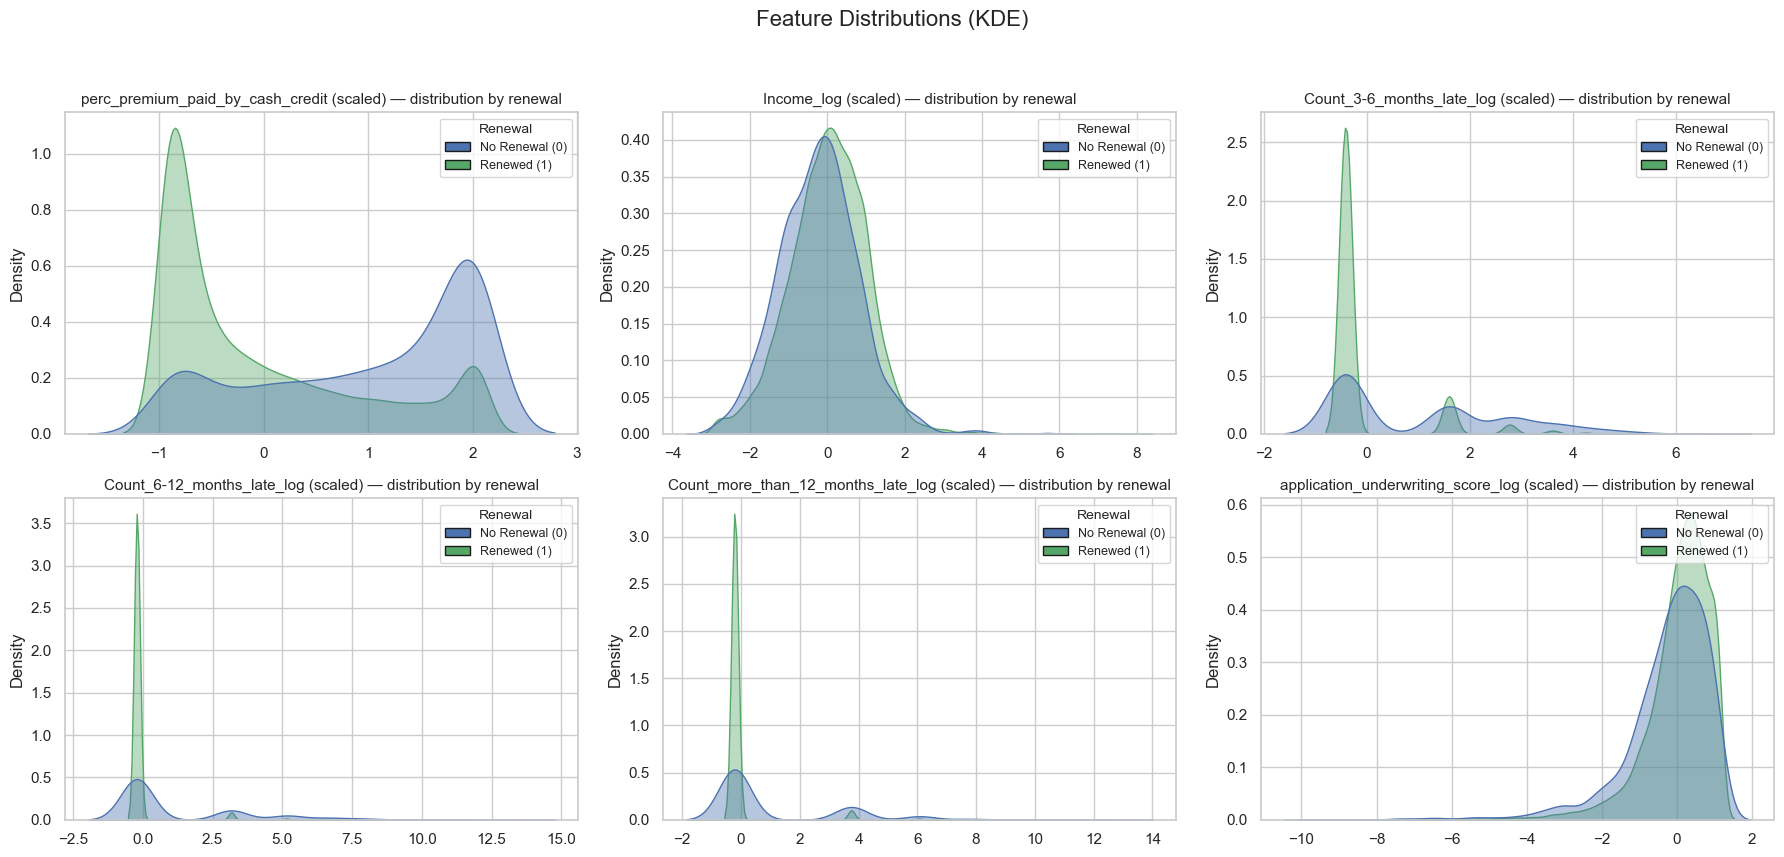

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# ---------- Settings ----------
palette_list = ['#4C72B0', '#55A868']   # class 0, class 1
label_map = {0: 'No Renewal (0)', 1: 'Renewed (1)'}
renewal_unique = sorted(X_viz['renewal'].dropna().unique())

# Build palette dict for seaborn
palette_dict = {cls: palette_list[i % len(palette_list)] for i, cls in enumerate(renewal_unique)}

# Select first 6 numeric features (excluding renewal)
num_feats = X_viz.select_dtypes(include=['float','int']).columns.drop('renewal').tolist()
kde_feats = num_feats[:6]
if len(kde_feats) == 0:
    raise ValueError("No numeric features found to plot.")

# ---------- Create 2x3 grid ----------
nrows, ncols = 2, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 9))
axes = axes.flatten()

for ax, feat in zip(axes, kde_feats):
    sns.kdeplot(
        data=X_viz, x=feat, hue='renewal', hue_order=renewal_unique,
        palette=palette_dict, fill=True, common_norm=False, alpha=0.4,
        linewidth=1.0, ax=ax
    )
    ax.set_title(f"{feat} (scaled) — distribution by renewal", fontsize=11)
    ax.set_xlabel("")   # keep x-labels compact for grid
    ax.set_ylabel("Density")

    # build legend handles with correct colors and labels
    legend_handles = [Patch(facecolor=palette_dict[cls], edgecolor='k', label=label_map.get(cls, str(cls))) for cls in renewal_unique]
    ax.legend(handles=legend_handles, title='Renewal', fontsize=9, title_fontsize=10, loc='upper right')

# If there are fewer than 6 numeric features, hide unused axes
if len(kde_feats) < len(axes):
    for ax in axes[len(kde_feats):]:
        ax.set_visible(False)

plt.suptitle("Feature Distributions (KDE)", fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Outlayer Analysis

In [171]:
# Create a copy of OG for processing
OG_OLA_proc = OG.copy()

# Convert age from days to years (integer)
OG_OLA_proc['age_in_years'] = (OG_OLA_proc['age_in_days'] / 365).astype(int)
# Drop the original age_in_days column
OG_OLA_proc = OG_OLA_proc.drop(columns=['age_in_days'])
# Drop the ID column from OG_OLA_proc
OG_OLA_proc = OG_OLA_proc.drop(columns=['id'])


In [173]:
OG_OLA_proc_outlier_handled = OG_OLA_proc.copy()

In [175]:
OG_OLA_proc_outlier_handled.describe()

,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,renewal,age_in_years
count,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000,79853.000000,79853.000000
mean,0.314288,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,10924.507533,0.937410,51.607404
std,0.334915,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,9401.676542,0.242226,14.270484
min,0.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,0.000000,21.000000
25%,0.034000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,5400.000000,1.000000,41.000000
50%,0.167000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,1.000000,51.000000
75%,0.538000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,13800.000000,1.000000,62.000000
max,1.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,1.000000,103.000000


In [177]:
# Define target
target_col = 'renewal'

# Extract categorical & numerical columns from OG_OLA_proc
cat_cols = OG_OLA_proc.select_dtypes(include=['object']).columns.tolist()
num_cols = OG_OLA_proc.select_dtypes(include=['int64', 'float64']).columns.drop(target_col).tolist()


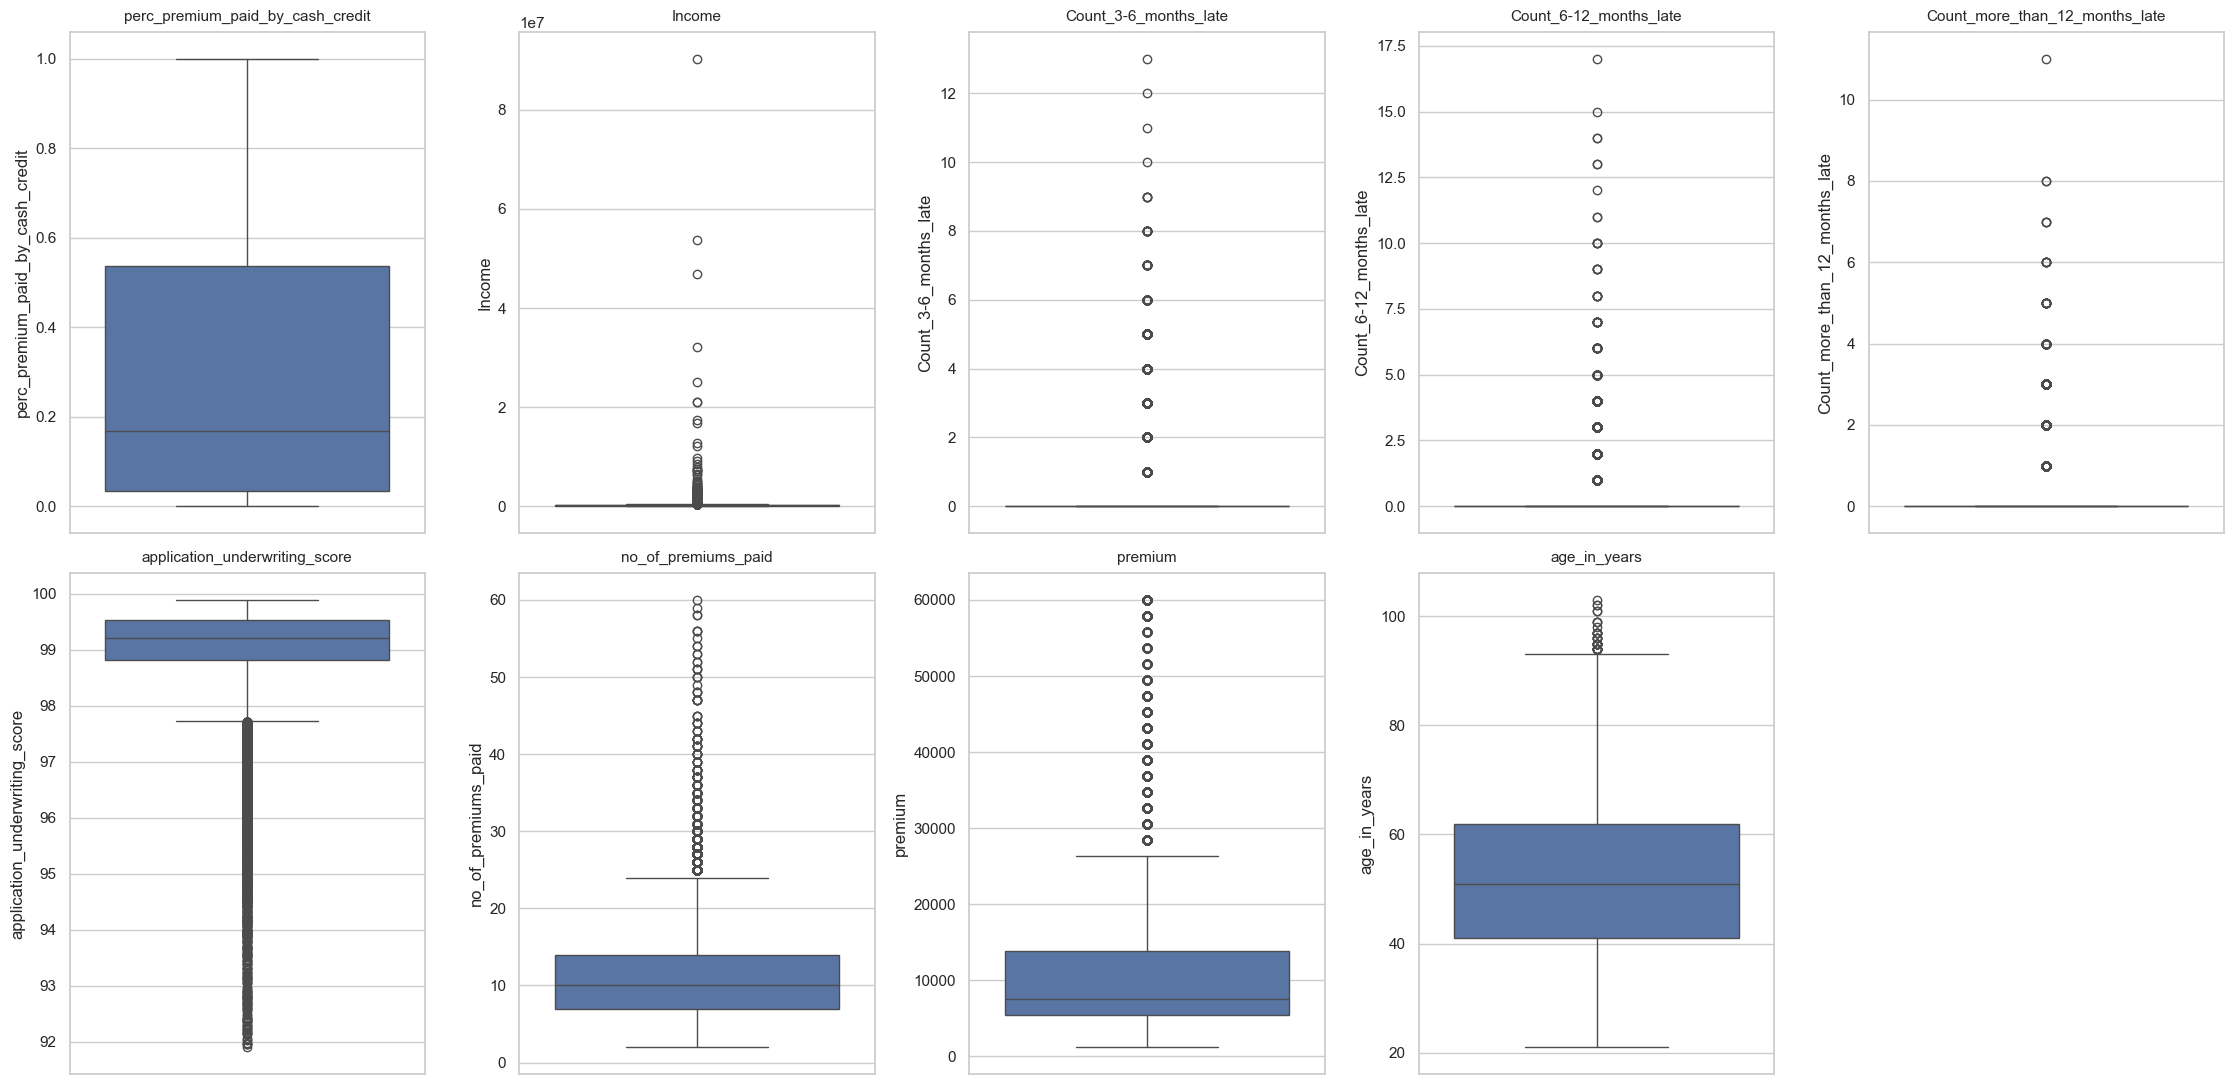

Saved figure to: boxplots_vertical_9_features.png


In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ---------- Settings ----------
sns.set_style("whitegrid")
OG_OLA_proc = OG_OLA_proc  # your dataframe
num_cols = num_cols  # list of 9 numeric column names

# Layout choices suitable for 9 features:
max_cols_per_row = 5   # 5 per row => for 9 features you'll get 2 rows (5 + 4)
n_plots = len(num_cols)
ncols = min(n_plots, max_cols_per_row)
nrows = int(np.ceil(n_plots / ncols))

# Figure sizing (adjust multipliers if you want larger plots)
fig_w = 4.5 * ncols   # width per subplot (in inches)
fig_h = 5.5 * nrows   # height per subplot (in inches)
fig, axes = plt.subplots(nrows, ncols, figsize=(fig_w, fig_h), squeeze=False)

# ---------- Plot loop ----------
for idx, col in enumerate(num_cols):
    r = idx // ncols
    c = idx % ncols
    ax = axes[r, c]

    # Vertical boxplot
    sns.boxplot(y=OG_OLA_proc[col], orient='v', ax=ax)

    # Title and formatting
    ax.set_title(col, fontsize=11, pad=8)
    ax.tick_params(axis='x', which='major', labelrotation=30)

    # Set separate y-limits per subplot with slight padding
    data = OG_OLA_proc[col].dropna()
    if not data.empty:
        mn, mx = data.min(), data.max()
        rng = mx - mn
        if rng == 0:
            ax.set_ylim(mn - 1, mx + 1)
        else:
            pad = 0.06 * rng
            ax.set_ylim(mn - pad, mx + pad)
    else:
        ax.set_ylim(-1, 1)

# Hide unused axes (if any)
total_axes = nrows * ncols
for j in range(n_plots, total_axes):
    r = j // ncols
    c = j % ncols
    axes[r, c].set_visible(False)

plt.tight_layout()

# Save high-res image
out_path = "boxplots_vertical_9_features.png"
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Saved figure to: {out_path}")


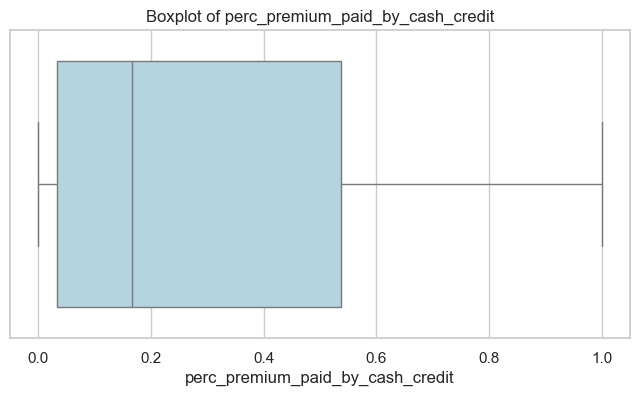

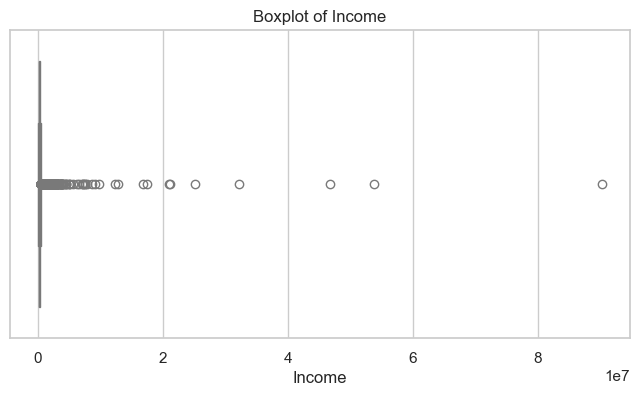

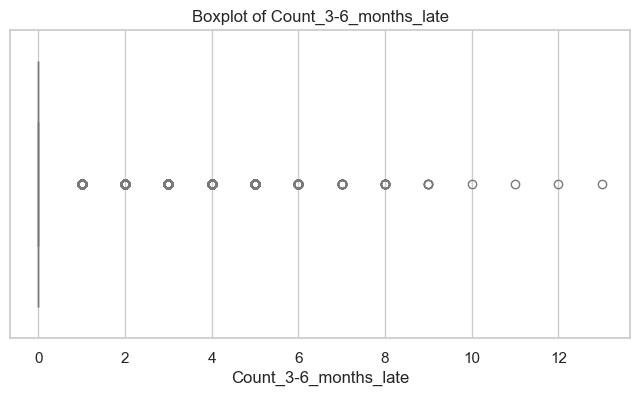

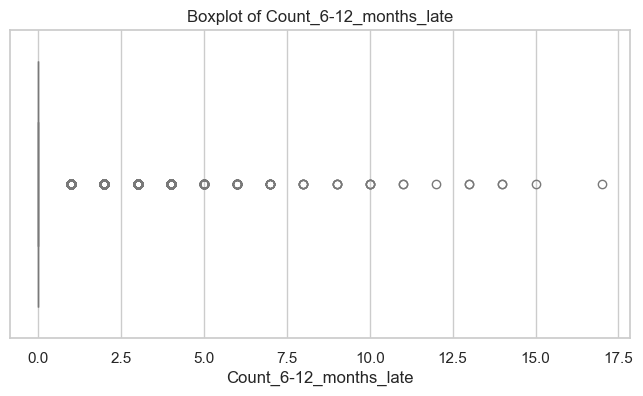

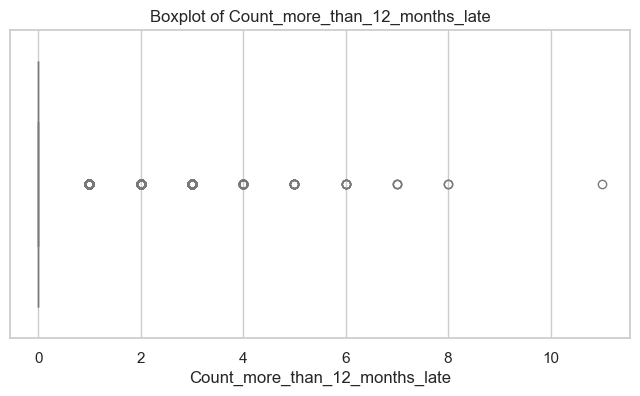

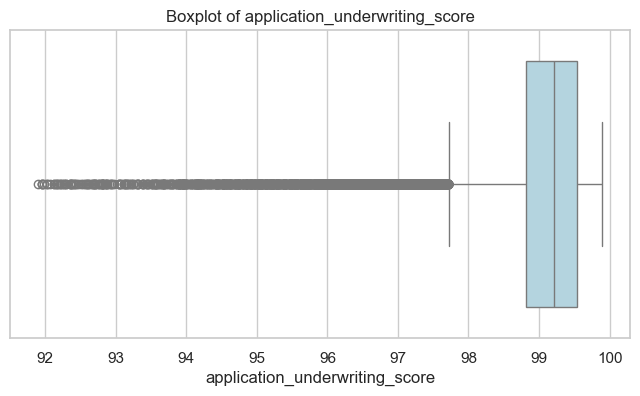

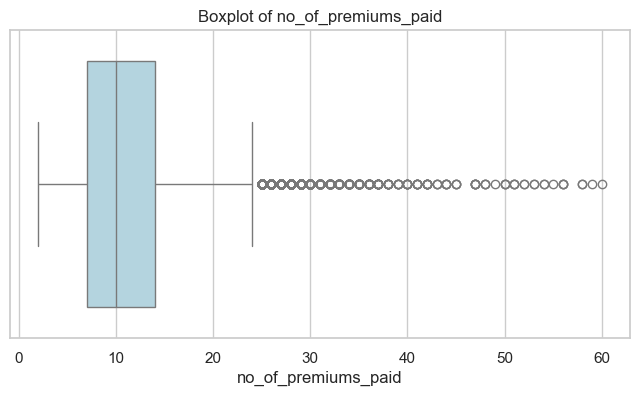

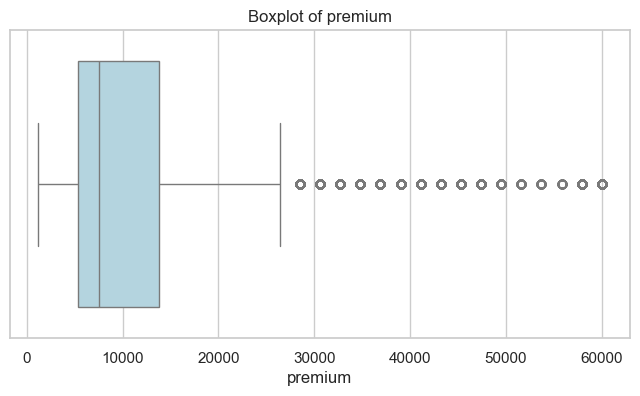

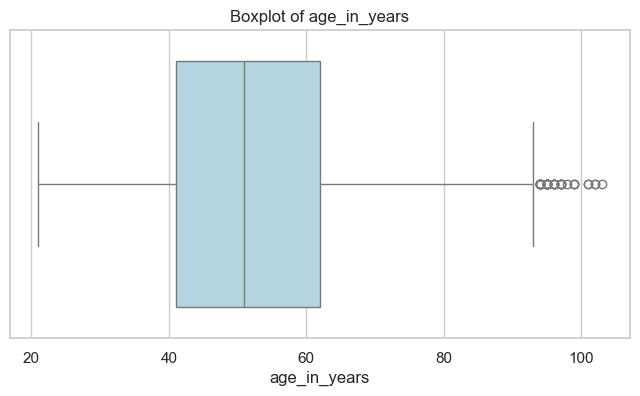

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=OG_OLA_proc[col], color="lightblue")
    plt.title(f"Boxplot of {col}")
    plt.show()


In [183]:
outliers_dict = {}

for col in num_cols:
    Q1 = OG_OLA_proc[col].quantile(0.25)
    Q3 = OG_OLA_proc[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Extract outlier rows
    outlier_rows = OG_OLA_proc.loc[
        (OG_OLA_proc[col] < lower) | (OG_OLA_proc[col] > upper), col
    ]
    
    # Store info
    outliers_dict[col] = {
        "lower_bound": lower,
        "upper_bound": upper,
        "distinct_vals": np.sort(outlier_rows.unique()),
        "num_distinct": outlier_rows.nunique(),
        "num_outliers": outlier_rows.shape[0]
    }

# Display results
for col, info in outliers_dict.items():
    print(f"\n{col}:")
    print(f"  Lower Bound = {info['lower_bound']:.2f}, Upper Bound = {info['upper_bound']:.2f}")
    print(f"  Outliers → {info['num_outliers']} rows ({info['num_distinct']} distinct values)")
    print(f"  Example values: {info['distinct_vals'][:20]}")  # show first 20 if too many


perc_premium_paid_by_cash_credit:
  Lower Bound = -0.72, Upper Bound = 1.29
  Outliers → 0 rows (0 distinct values)
  Example values: []

Income:
  Lower Bound = -108110.00, Upper Bound = 468210.00
  Outliers → 3428 rows (2233 distinct values)
  Example values: [468280 468320 468520 468870 468920 469080 469140 469180 469240 469310
 469360 469550 469600 469620 469830 469840 469920 469990 470020 470040]

Count_3-6_months_late:
  Lower Bound = 0.00, Upper Bound = 0.00
  Outliers → 12955 rows (13 distinct values)
  Example values: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]

Count_6-12_months_late:
  Lower Bound = 0.00, Upper Bound = 0.00
  Outliers → 3925 rows (16 distinct values)
  Example values: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 17.]

Count_more_than_12_months_late:
  Lower Bound = 0.00, Upper Bound = 0.00
  Outliers → 3718 rows (9 distinct values)
  Example values: [ 1.  2.  3.  4.  5.  6.  7.  8. 11.]

application_underwriting_score:
  Lower Boun

In [185]:
outliers_dict = {}

for col in num_cols:
    Q1 = OG_OLA_proc[col].quantile(0.25)
    Q3 = OG_OLA_proc[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Extract outlier rows
    outlier_rows = OG_OLA_proc.loc[
        (OG_OLA_proc[col] < lower) | (OG_OLA_proc[col] > upper), col
    ]
    
    # Store info
    outliers_dict[col] = {
        "lower_bound": lower,
        "upper_bound": upper,
        "distinct_vals": np.sort(outlier_rows.unique()),
        "num_distinct": outlier_rows.nunique(),
        "num_outliers": outlier_rows.shape[0]
    }

# Display results
for col, info in outliers_dict.items():
    print(f"\n{col}:")
    print(f"  Lower Bound = {info['lower_bound']:.2f}, Upper Bound = {info['upper_bound']:.2f}")
    print(f"  Outliers → {info['num_outliers']} rows ({info['num_distinct']} distinct values)")
    print(f"  Example values: {info['distinct_vals'][:20]}")  # show first 20 if too many


perc_premium_paid_by_cash_credit:
  Lower Bound = -0.72, Upper Bound = 1.29
  Outliers → 0 rows (0 distinct values)
  Example values: []

Income:
  Lower Bound = -108110.00, Upper Bound = 468210.00
  Outliers → 3428 rows (2233 distinct values)
  Example values: [468280 468320 468520 468870 468920 469080 469140 469180 469240 469310
 469360 469550 469600 469620 469830 469840 469920 469990 470020 470040]

Count_3-6_months_late:
  Lower Bound = 0.00, Upper Bound = 0.00
  Outliers → 12955 rows (13 distinct values)
  Example values: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]

Count_6-12_months_late:
  Lower Bound = 0.00, Upper Bound = 0.00
  Outliers → 3925 rows (16 distinct values)
  Example values: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 17.]

Count_more_than_12_months_late:
  Lower Bound = 0.00, Upper Bound = 0.00
  Outliers → 3718 rows (9 distinct values)
  Example values: [ 1.  2.  3.  4.  5.  6.  7.  8. 11.]

application_underwriting_score:
  Lower Boun

In [187]:
import numpy as np
import pandas as pd

# Assume OG_OLA_proc is your pre-processed DataFrame with all the features and the 'renewal' column.
# Let's define the list of numerical columns based on your provided output.
num_cols = [
    'perc_premium_paid_by_cash_credit',
    'Income',
    'Count_3-6_months_late',
    'Count_6-12_months_late',
    'Count_more_than_12_months_late',
    'application_underwriting_score',
    'no_of_premiums_paid',
    'premium',
    'age_in_years'
]

outliers_dict = {}

for col in num_cols:
    Q1 = OG_OLA_proc[col].quantile(0.25)
    Q3 = OG_OLA_proc[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Identify the rows that are outliers and those that are not.
    outlier_mask = (OG_OLA_proc[col] < lower) | (OG_OLA_proc[col] > upper)
    non_outlier_mask = ~outlier_mask

    # Get the 'renewal' distribution for both groups.
    renewal_dist_outliers = OG_OLA_proc.loc[outlier_mask, 'renewal'].value_counts(normalize=True)
    renewal_dist_non_outliers = OG_OLA_proc.loc[non_outlier_mask, 'renewal'].value_counts(normalize=True)

    # Store all the information
    outliers_dict[col] = {
        "lower_bound": lower,
        "upper_bound": upper,
        "num_outliers": outlier_mask.sum(),
        "renewal_dist_outliers": renewal_dist_outliers.to_dict(),
        "renewal_dist_non_outliers": renewal_dist_non_outliers.to_dict(),
    }

# Display results
for col, info in outliers_dict.items():
    print(f"\n===== Analysis for '{col}' =====")
    print(f"Number of outliers: {info['num_outliers']}")
    print("-" * 20)

    # Print renewal distribution for non-outliers
    print("Non-Outlier Data:")
    if 0 in info['renewal_dist_non_outliers']:
        print(f"  - % Non-renewal (0): {info['renewal_dist_non_outliers'][0]:.2%}")
    if 1 in info['renewal_dist_non_outliers']:
        print(f"  - % Renewal (1): {info['renewal_dist_non_outliers'][1]:.2%}")

    # Print renewal distribution for outliers
    print("\nOutlier Data:")
    # Handle cases where no outliers exist for a given class
    if 0 in info['renewal_dist_outliers']:
        print(f"  - % Non-renewal (0): {info['renewal_dist_outliers'][0]:.2%}")
    else:
        print("  - % Non-renewal (0): 0.00%")
    if 1 in info['renewal_dist_outliers']:
        print(f"  - % Renewal (1): {info['renewal_dist_outliers'][1]:.2%}")
    else:
        print("  - % Renewal (1): 0.00%")

    # Compare the two distributions and provide a conclusion
    print("\nImpact on Renewal:")
    if info['num_outliers'] > 0:
        # Check if a clear impact exists
        non_renewal_outliers = info['renewal_dist_outliers'].get(0, 0)
        non_renewal_non_outliers = info['renewal_dist_non_outliers'].get(0, 0)
        
        diff = non_renewal_outliers - non_renewal_non_outliers
        
        if abs(diff) > 0.05: # A 5% difference is a good heuristic
            if diff > 0:
                print(f"  - Outliers are **MORE** likely to be non-renewals (Class 0) by {abs(diff):.2%}. These outliers are likely **predictive** and should be preserved.")
            else:
                print(f"  - Outliers are **LESS** likely to be non-renewals (Class 0) by {abs(diff):.2%}. These outliers are also likely **informative** and should be preserved.")
        else:
            print("  - Outliers do NOT show a strong impact on renewal rates. They may be treated as noise and can be imputed or capped.")
    else:
        print("  - No outliers found for this feature to perform an analysis.")


===== Analysis for 'perc_premium_paid_by_cash_credit' =====
Number of outliers: 0
--------------------
Non-Outlier Data:
  - % Non-renewal (0): 6.26%
  - % Renewal (1): 93.74%

Outlier Data:
  - % Non-renewal (0): 0.00%
  - % Renewal (1): 0.00%

Impact on Renewal:
  - No outliers found for this feature to perform an analysis.

===== Analysis for 'Income' =====
Number of outliers: 3428
--------------------
Non-Outlier Data:
  - % Non-renewal (0): 6.33%
  - % Renewal (1): 93.67%

Outlier Data:
  - % Non-renewal (0): 4.78%
  - % Renewal (1): 95.22%

Impact on Renewal:
  - Outliers do NOT show a strong impact on renewal rates. They may be treated as noise and can be imputed or capped.

===== Analysis for 'Count_3-6_months_late' =====
Number of outliers: 12955
--------------------
Non-Outlier Data:
  - % Non-renewal (0): 4.02%
  - % Renewal (1): 95.98%

Outlier Data:
  - % Non-renewal (0): 17.84%
  - % Renewal (1): 82.16%

Impact on Renewal:
  - Outliers are **MORE** likely to be non-renew

In [189]:

for col in num_cols:
    Q1 = OG_OLA_proc_outlier_handled[col].quantile(0.25)
    Q3 = OG_OLA_proc_outlier_handled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Mark outliers as NaN
    OG_OLA_proc_outlier_handled.loc[
        (OG_OLA_proc_outlier_handled[col] < lower) | 
        (OG_OLA_proc_outlier_handled[col] > upper), col
    ] = np.nan

print("NaNs introduced after outlier marking:\n", OG_OLA_proc_outlier_handled[num_cols].isna().sum())

NaNs introduced after outlier marking:
 perc_premium_paid_by_cash_credit        0
Income                               3428
Count_3-6_months_late               13052
Count_6-12_months_late               4022
Count_more_than_12_months_late       3815
application_underwriting_score       6355
no_of_premiums_paid                  1426
premium                              4523
age_in_years                           44
dtype: int64


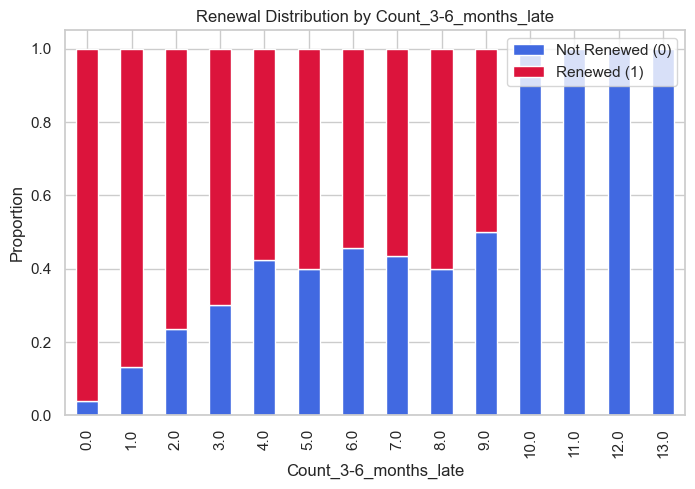


=== Crosstab for Count_3-6_months_late ===
renewal                    0      1
Count_3-6_months_late              
0.0                    0.039  0.961
1.0                    0.131  0.869
2.0                    0.235  0.765
3.0                    0.302  0.698
4.0                    0.422  0.578
5.0                    0.399  0.601
6.0                    0.456  0.544
7.0                    0.435  0.565
8.0                    0.400  0.600
9.0                    0.500  0.500
10.0                   1.000  0.000
11.0                   1.000  0.000
12.0                   1.000  0.000
13.0                   1.000  0.000


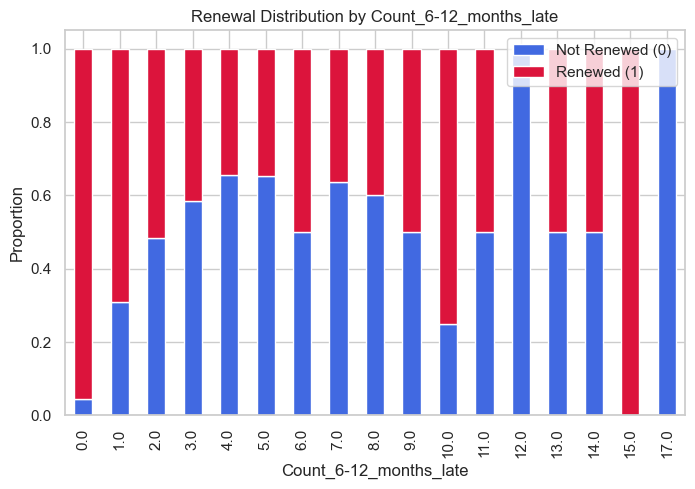


=== Crosstab for Count_6-12_months_late ===
renewal                     0      1
Count_6-12_months_late              
0.0                     0.045  0.955
1.0                     0.309  0.691
2.0                     0.482  0.518
3.0                     0.584  0.416
4.0                     0.654  0.346
5.0                     0.652  0.348
6.0                     0.500  0.500
7.0                     0.636  0.364
8.0                     0.600  0.400
9.0                     0.500  0.500
10.0                    0.250  0.750
11.0                    0.500  0.500
12.0                    1.000  0.000
13.0                    0.500  0.500
14.0                    0.500  0.500
15.0                    0.000  1.000
17.0                    1.000  0.000


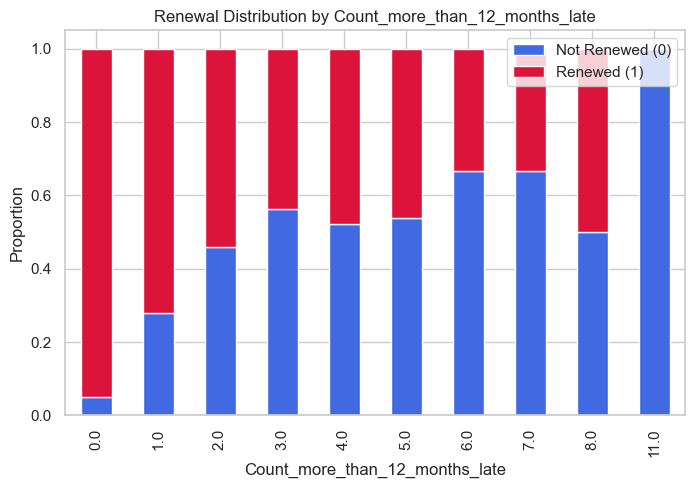


=== Crosstab for Count_more_than_12_months_late ===
renewal                             0      1
Count_more_than_12_months_late              
0.0                             0.049  0.951
1.0                             0.279  0.721
2.0                             0.458  0.542
3.0                             0.563  0.437
4.0                             0.521  0.479
5.0                             0.538  0.462
6.0                             0.667  0.333
7.0                             0.667  0.333
8.0                             0.500  0.500
11.0                            1.000  0.000


In [191]:
import matplotlib.pyplot as plt

late_features = [
    "Count_3-6_months_late",
    "Count_6-12_months_late",
    "Count_more_than_12_months_late"
]

for feat in late_features:
    # Crosstab for proportions
    ct = pd.crosstab(
        OG_OLA_proc[feat], 
        OG_OLA_proc['renewal'], 
        normalize='index'
    )

    # Plot
    ct.plot(
        kind="bar", stacked=True, 
        color=["royalblue", "crimson"], figsize=(8,5)
    )
    plt.title(f"Renewal Distribution by {feat}")
    plt.ylabel("Proportion")
    plt.xlabel(feat)
    plt.legend(["Not Renewed (0)", "Renewed (1)"])
    plt.show()

    # Print the table as well
    print(f"\n=== Crosstab for {feat} ===")
    print(ct.round(3))


In [193]:
# Count records for values > 10 in Count_6-12_months_late, grouped by renewal
above_10_counts = (
    OG_OLA_proc[OG_OLA_proc['Count_6-12_months_late'] > 0]
    .groupby(['Count_6-12_months_late', 'renewal'])
    .size()
    .unstack(fill_value=0)
)

above_10_counts

renewal,0,1
Count_6-12_months_late,,
1.0,828,1852
2.0,334,359
3.0,185,132
4.0,85,45
5.0,30,16
6.0,13,13
7.0,7,4
8.0,3,2
9.0,2,2


In [195]:
col = "premium"  # you can change this to any numeric column

# Recompute bounds for this column
Q1 = OG_OLA_proc[col].quantile(0.25)
Q3 = OG_OLA_proc[col].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR

# Filter only outliers above UQR
outlier_counts = (
    OG_OLA_proc.loc[OG_OLA_proc[col] > upper, col]
    .value_counts()
    .sort_index()
)

print(f"Upper Bound = {upper:.2f}")
print("Outlier value counts above upper bound:")
print(outlier_counts)


Upper Bound = 26400.00
Outlier value counts above upper bound:
premium
28500    801
30600    474
32700    688
34800    392
36900    359
39000    259
41100    207
43200    158
45300    141
47400    134
49500    100
51600     81
53700     71
55800     52
57900    187
60000    419
Name: count, dtype: int64


### Premium Outlier Analysis

Using the IQR method, the **upper bound** for premiums was calculated as:

- **Upper Bound = 26,400**


- **Findings:**  
  - Premiums above 26,400 are flagged as outliers.  
  - A total of **4,523 records** fall into this category.  
  - Distinct premium values observed beyond the upper bound are structured and occur in multiples of 2,100.



- **Interpretation:**  
  - These values appear to be **systematic premium brackets**, not random errors.  
  - The structured increments suggest **genuine high-value policies** rather than noise.  
  - While they are statistical outliers, removing them might lead to loss of important information on high-paying customers.

- **Decision:**  
  Retain these records, but keep in mind their outlier nature when modeling.  
  Tree-based models (e.g., XGBoost, Random Forest) can naturally handle such skewed distributions, whereas normalization/standardization may be more appropriate for statistical models.

In [198]:
# Find violations where premiums paid > age
violations_df = OG_OLA_proc[
    OG_OLA_proc['no_of_premiums_paid'] > OG_OLA_proc['age_in_years']
][['age_in_years', 'no_of_premiums_paid', 'renewal']]

# Count how many
print(f"Total violations (premiums > age): {len(violations_df)}")

# Display the first few violating records
display(violations_df.head(20))


Total violations (premiums > age): 19


,age_in_years,no_of_premiums_paid,renewal
6084,33,37,1
7095,30,31,1
9608,36,50,0
15665,32,34,1
16203,33,38,0
19813,29,30,1
26644,53,60,1
41724,48,58,1
45055,45,47,0
46456,27,29,1


In [200]:
# Compute total late payments on the fly
total_lates = (
    OG_OLA_proc['Count_3-6_months_late'].fillna(0) +
    OG_OLA_proc['Count_6-12_months_late'].fillna(0) +
    OG_OLA_proc['Count_more_than_12_months_late'].fillna(0)
)

# Find violations
violations_lates = (total_lates > OG_OLA_proc['no_of_premiums_paid']).sum()
print(f"Records where total late payments > premiums paid: {violations_lates}")

# Get violating records (without adding total_lates column to OG_OLA_proc)
violating_records = OG_OLA_proc.loc[
    total_lates > OG_OLA_proc['no_of_premiums_paid'],
    ['Count_3-6_months_late','Count_6-12_months_late',
     'Count_more_than_12_months_late','no_of_premiums_paid','renewal']
]

violating_records


Records where total late payments > premiums paid: 242


,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,no_of_premiums_paid,renewal
7,1.0,6.0,4.0,3,0
40,0.0,10.0,0.0,8,0
566,0.0,3.0,1.0,3,0
647,0.0,4.0,0.0,2,1
930,0.0,2.0,1.0,2,0
...,...,...,...,...,...
77453,1.0,3.0,1.0,4,0
77758,1.0,5.0,2.0,5,0
77942,1.0,6.0,0.0,5,0
78500,1.0,2.0,0.0,2,1


### Handling Logical Inconsistencies in Late Payments

While exploring the dataset, we checked if the **total number of late payments** across all categories exceeded the **number of premiums paid**:

total_lates = Count_3_6_months_late + Count_6_12_months_late + Count_more_than_12_months_late

Violation if: total_lates > no_of_premiums_paid

---

**Findings:**  
- **242 records** (≈0.3% of the dataset) violated this condition.  
- Example: A customer with `no_of_premiums_paid = 2` but `total_lates = 6`.  
- These are **logically inconsistent**, since a customer cannot have more late payments than total premiums made.

---

**Options to Handle:**  
1. **Drop the violating records**  
   - Simple and clean, removes only a very small portion of data.  
2. **Cap total late counts** at the number of premiums paid  
   - Preserves all rows but may distort the real late distribution.  
3. **Investigate renewal outcomes** among these cases  
   - If most are non-renewals, they may still carry useful signal.

---

**Decision:**  
Since the violations are rare (**242 out of ~80k**), the preferred approach is to **drop these rows** for cleaner data integrity.



### Age Outlier Analysis

Using the IQR method, the **upper bound for age** was calculated as **93.5 years**.

- **Findings:**  
  - A total of **44 records** were flagged as outliers.  
  - Distinct values range from **94 to 103 years**.  
  - These are only slightly beyond the statistical cutoff and are realistic ages.

- **Interpretation:**  
  - The deviations are not extreme compared to the upper bound.  
  - Elderly customers (**94–103 years**) are plausible and valid records, not data entry errors.  
  - Removing them would unnecessarily reduce data diversity.

- **Decision:**  
  We will **keep these records**, as they represent genuine customers and do not distort the dataset.


In [207]:
# Pick the feature we are analyzing
col = "no_of_premiums_paid"

# Get its bounds
Q1 = OG_OLA_proc[col].quantile(0.25)
Q3 = OG_OLA_proc[col].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR

# Filter only outlier rows
outlier_data = OG_OLA_proc.loc[OG_OLA_proc[col] > upper, [col, target_col]]

# Count target distribution for each distinct outlier value
outlier_summary = (
    outlier_data.groupby([col, target_col])
    .size()
    .unstack(fill_value=0)  # ensures both 0 and 1 appear
    .rename(columns={0: "Not Renewed", 1: "Renewed"})
)

print(f"Upper Bound = {upper:.2f}")
print("Outlier value counts by target:")
display(outlier_summary)


Upper Bound = 24.50
Outlier value counts by target:


renewal,Not Renewed,Renewed
no_of_premiums_paid,,
25,23,282
26,15,226
27,8,178
28,12,140
29,8,111
30,6,85
31,5,56
32,6,45
33,2,41


### Outliers in *Number of Premiums Paid*

- **Observation:**  
  - The upper bound for *no_of_premiums_paid* based on the IQR method was **24.5**.  
  - We identified **1426 records** above this threshold, with values ranging from **25 to 60**.  
  - Distribution of target labels shows that customers with higher premium counts are **predominantly renewed**.  

- **Example:**  
  - At `no_of_premiums_paid = 25`, ~92% customers renewed.  
  - Even at higher counts (e.g., 40+), most customers still renewed.  

- **Interpretation:**  
  - These values are **not data entry errors** but likely represent **long-term policyholders** who consistently renewed their plans.  
  - Hence, they are **business-relevant extreme values**, not anomalies to be removed.  

- **Decision:**  
  - **Keep these outliers as-is.**  
  - They carry **important predictive signal** about loyalty/renewal behavior.  
  - No imputation or capping applied.  


In [210]:
upper_bound = 468210
high_income = OG_OLA_proc[OG_OLA_proc['Income'] > upper_bound]
normal_income = OG_OLA_proc[OG_OLA_proc['Income'] <= upper_bound]

print("Renewal rate (high income):", high_income['renewal'].mean())
print("Renewal rate (normal income):", normal_income['renewal'].mean())


Renewal rate (high income): 0.9521586931155193
Renewal rate (normal income): 0.9367484461890743


In [212]:
# Compute IQR bounds for Income
Q1 = OG_OLA_proc['Income'].quantile(0.25)
Q3 = OG_OLA_proc['Income'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

print("Upper Bound for Income (IQR method):", upper_bound)

# Subset of records above upper bound
income_outliers = OG_OLA_proc[OG_OLA_proc['Income'] > upper_bound]

# Total count
print("Number of records above upper bound:", income_outliers.shape[0])

# Breakdown by target
print("\nBreakdown by renewal:")
print(income_outliers['renewal'].value_counts())


Upper Bound for Income (IQR method): 468210.0
Number of records above upper bound: 3428

Breakdown by renewal:
renewal
1    3264
0     164
Name: count, dtype: int64


In [214]:
# Max income where renewal == 0
max_income_nonrenew = OG_OLA_proc.loc[OG_OLA_proc['renewal'] == 0, 'Income'].max()
print("Max Income (renewal = 0):", max_income_nonrenew)

# Number of records with income greater than that
count_higher = (OG_OLA_proc['Income'] > max_income_nonrenew).sum()
print("Number of records with Income > that value:", count_higher)


Max Income (renewal = 0): 7500070
Number of records with Income > that value: 16


### Conclusion on Income Outliers

- Using the IQR method, the **upper bound for income** was identified as **468,210**.  
- **3,428 records (~4.3% of the dataset)** fall above this bound.  
- Among these high-income customers:  
  - **Renewal rate = 95.2%** (vs. 93.7% for normal income customers).  
  - Only **164 customers (≈4.8%) did not renew**.  
- The **maximum income among non-renewed customers** is **7,500,070**, and there are **only 16 customers** with income greater than this.  

**Interpretation:**  
- High-income outliers are not random noise but represent a valid customer segment.  
- They exhibit **higher renewal rates than the normal-income group**, indicating strong loyalty among high-income customers.  
- Removing or imputing these values would risk discarding meaningful predictive information.  

**Decision:**  
 We will **retain income outliers without imputation**, as they carry valuable signal for predicting renewals.  


### Conclusion on Income Outliers

- Using the IQR method, the **upper bound for income** was identified as **468,210**.  
- **3,428 records (~4.3% of the dataset)** fall above this bound.  
- Among these high-income customers:  
  - **Renewal rate = 95.2%** (vs. 93.7% for normal income customers).  
  - Only **164 customers (≈4.8%) did not renew**.  
- The **maximum income among non-renewed customers** is **7,500,070**, and there are **only 16 customers** with income greater than this.  

**Interpretation:**  
- High-income outliers are not random noise but represent a valid customer segment.  
- They exhibit **higher renewal rates than the normal-income group**, indicating strong loyalty among high-income customers.  
- Removing or imputing these values would risk discarding meaningful predictive information.  

**Decision:**  
 We will **retain income outliers without imputation**, as they carry valuable signal for predicting renewals.  


In [220]:
# Identify categorical columns
cat_cols = OG_OLA_proc.select_dtypes(include=['object']).columns.tolist()

# Separate binary vs multi-categorical
binary_cats = [c for c in cat_cols if OG_OLA_proc[c].nunique() == 2]
multi_cats  = [c for c in cat_cols if OG_OLA_proc[c].nunique() > 2]


In [222]:

print("Categorical:", cat_cols)
print("Binary categorical:", binary_cats)
print("Multi categorical:", multi_cats)

Categorical: ['sourcing_channel', 'residence_area_type']
Binary categorical: ['residence_area_type']
Multi categorical: ['sourcing_channel']


In [250]:
# Apply one-hot encoding differently
OG_OLA_proc_encoded = pd.get_dummies(
    OG_OLA_proc,
    columns=binary_cats,
    drop_first=True  # safe for binary
)

OG_OLA_proc_encoded = pd.get_dummies(
    OG_OLA_proc_encoded,
    columns=multi_cats,
    drop_first=False  # keep all categories for multi-categorical
)

In [252]:
print("Shape before encoding:", OG_OLA_proc.shape)
print("Shape after encoding :", OG_OLA_proc_encoded.shape)

Shape before encoding: (79853, 14)
Shape after encoding : (79853, 18)


###  Observation about missing late payment counts  

Interestingly, whenever we encounter missing values in the late payment fields  
(`Count_3-6_months_late`, `Count_6-12_months_late`, and `Count_more_than_12_months_late`),  
all three of them are missing together for the same customer records.  

This suggests that the missingness is not random but systematic. One possible explanation is that for these customers, there were simply no late payments at all, and the system chose to leave all late payment fields blank instead of recording zeros.  

This makes the assumption of imputing missing values with zero even more plausible,  
because the absence of data across all three late payment columns may effectively indicate  
“no late payments recorded.”  

At the same time, this pattern is worth validating further, since systematic missingness  
could reflect a data-entry convention rather than random data loss.  


###  Observation about missing late payment counts  

Interestingly, whenever we encounter missing values in the late payment fields  
(`Count_3-6_months_late`, `Count_6-12_months_late`, and `Count_more_than_12_months_late`),  
all three of them are missing together for the same customer records.  

This suggests that the missingness is not random but systematic. One possible explanation is that for these customers, there were simply no late payments at all, and the system chose to leave all late payment fields blank instead of recording zeros.  

This makes the assumption of imputing missing values with zero even more plausible,  
because the absence of data across all three late payment columns may effectively indicate  
“no late payments recorded.”  

At the same time, this pattern is worth validating further, since systematic missingness  
could reflect a data-entry convention rather than random data loss.  


In [256]:
# List of late payment columns
late_payment_cols = [
    'Count_3-6_months_late',
    'Count_6-12_months_late',
    'Count_more_than_12_months_late'
]

# Impute missing values with zero
OG_OLA_proc_encoded[late_payment_cols] = OG_OLA_proc_encoded[late_payment_cols].fillna(0)

# Quick check
print(OG_OLA_proc_encoded[late_payment_cols].isnull().sum())


Count_3-6_months_late             0
Count_6-12_months_late            0
Count_more_than_12_months_late    0
dtype: int64


###  Handling missing values in `application_underwriting_score`  

The column `application_underwriting_score` has a noticeable number of missing values.  
Unlike the late payment counts, where missing values are clearly dominated by zeros,  
this feature is a continuous score and may be influenced by other attributes such as  
income, premium amount, age, or number of premiums paid.  

If we were to impute it with a simple **mean**, **median**, or **mode**,  
we would lose the variation and introduce bias by assigning the same value across all missing entries.  

To better preserve relationships in the data, a more suitable approach is to use  
**KNN imputation**. This method estimates missing values by looking at the most  
similar records (nearest neighbors) and imputing based on their values.  
This way, the imputed score is more context-aware and consistent with the profile  
of the customer.  


In [262]:
OG_OLA_proc_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   perc_premium_paid_by_cash_credit  79853 non-null  float64 
 1   Income                            79853 non-null  int64   
 2   Count_3-6_months_late             79853 non-null  float64 
 3   Count_6-12_months_late            79853 non-null  float64 
 4   Count_more_than_12_months_late    79853 non-null  float64 
 5   application_underwriting_score    76879 non-null  float64 
 6   no_of_premiums_paid               79853 non-null  int64   
 7   premium                           79853 non-null  int64   
 8   renewal                           79853 non-null  int64   
 9   age_in_years                      79853 non-null  int64   
 10  age_group                         79848 non-null  category
 11  premium_group                     79853 non-null  cate

In [264]:
# List the columns you want to remove
columns_to_drop = ['age_group', 'premium_group']

# Use .drop() to remove the columns. 
# axis=1 specifies columns, and inplace=True modifies the DataFrame directly.
OG_OLA_proc_encoded.drop(columns=columns_to_drop, inplace=True)

In [266]:
# Select numeric columns (to help KNN find neighbors)
num_cols = OG_OLA_proc_encoded.select_dtypes(include=['int64','float64']).columns.tolist()

# Initialize KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN to the entire encoded dataset
OG_OLA_proc_encoded_imputed = pd.DataFrame(
    knn_imputer.fit_transform(OG_OLA_proc_encoded),
    columns=OG_OLA_proc_encoded.columns,
    index=OG_OLA_proc_encoded.index
)

# Replace back into OG_OLA_proc_encoded (only underwriting score, but now everything imputed)
OG_OLA_proc_encoded['application_underwriting_score'] = OG_OLA_proc_encoded_imputed['application_underwriting_score']


# Check missing count
print("Missing in application_underwriting_score after KNN:",
      OG_OLA_proc_encoded['application_underwriting_score'].isnull().sum())

Missing in application_underwriting_score after KNN: 0


In [268]:
# Step 1: Copy OG_OLA_proc
OG_OLA_proc_imputed = OG_OLA_proc.copy()

# Step 2: Impute missing values from OG_OLA_proc_encoded_imputed
cols_to_impute = [
    'Count_3-6_months_late',
    'Count_6-12_months_late',
    'Count_more_than_12_months_late',
    'application_underwriting_score'
]

for col in cols_to_impute:
    OG_OLA_proc_imputed[col] = OG_OLA_proc_encoded_imputed[col]

# Step 3: Check missing values (should be 0 now)
print("Missing values after imputation:\n", OG_OLA_proc_imputed[cols_to_impute].isnull().sum())


Missing values after imputation:
 Count_3-6_months_late             0
Count_6-12_months_late            0
Count_more_than_12_months_late    0
application_underwriting_score    0
dtype: int64


###  Separate datasets for different model families  

Since tree-based models (e.g., Decision Tree, Random Forest, XGBoost) do not require  
normalization or standardization, we will keep one dataset in its **raw numeric form**  
(after imputations and one-hot encoding).  

However, for models that are sensitive to feature scale (e.g., Logistic Regression,  
KNN, SVM, Neural Networks), we will maintain a **separately standardized dataset**.  

- **`OG_OLA_proc_encoded`** → for tree-based models (no scaling).  
- **`OG_OLA_proc_scaled`** → for statistical / distance-based models (after standardization).  

This ensures that each model type gets the input in the most suitable form  
without mixing preprocessing requirements.


In [272]:
# Tree dataset
OG_OLA_proc_tree = OG_OLA_proc_encoded_imputed.copy()

In [274]:
# Statistical dataset (standardization)
OG_OLA_proc_stat = OG_OLA_proc_encoded_imputed.copy()
scaler_stat = StandardScaler()
num_cols_stat = OG_OLA_proc_stat.select_dtypes(include=['int64','float64']).columns.drop('renewal')
OG_OLA_proc_stat[num_cols_stat] = scaler_stat.fit_transform(OG_OLA_proc_stat[num_cols_stat])


In [280]:
# Normalized dataset
OG_OLA_proc_norm = OG_OLA_proc_encoded_imputed.copy()
scaler_norm = MinMaxScaler()
num_cols_norm = OG_OLA_proc_norm.select_dtypes(include=['int64','float64']).columns.drop('renewal')
OG_OLA_proc_norm[num_cols_norm] = scaler_norm.fit_transform(OG_OLA_proc_norm[num_cols_norm])

### Handling Imbalanced Target (Renewal vs Non-Renewal)

In our dataset, around 93% of customers renew, while only 7% do not renew.  
If we train on this data directly, models will become biased towards predicting renewals, missing the critical minority class of non-renewals.

To address this, we applied different strategies:
- **Tree-based models (XGBoost, Random Forest):** retain the imbalanced dataset and adjust `scale_pos_weight` to emphasize the minority class.
- **Statistical and neural models (Logistic Regression, SVM, KNN):** create balanced training sets using oversampling (SMOTE/ADASYN) so that non-renewals are equally represented.
- **Evaluation metrics:** we will rely on balanced accuracy, F1-scores per class, and PR-AUC, to ensure the model performs well for both renewals and non-renewals.

This approach helps avoid missing non-renewals while still retaining high accuracy on renewals.


In [287]:
smote = SMOTE(random_state=42)

In [289]:
# For standardized dataset
OG_OLA_proc_stat_balanced, y_stat_bal = smote.fit_resample(
    OG_OLA_proc_stat.drop(columns=[target_col]),
    OG_OLA_proc_stat[target_col]
)

In [291]:
# Recombine into DataFrame
OG_OLA_proc_stat_balanced = pd.DataFrame(OG_OLA_proc_stat_balanced, columns=OG_OLA_proc_stat.drop(columns=[target_col]).columns)
OG_OLA_proc_stat_balanced[target_col] = y_stat_bal

In [293]:
# For normalized dataset
OG_OLA_proc_norm_balanced, y_norm_bal = smote.fit_resample(
    OG_OLA_proc_norm.drop(columns=[target_col]),
    OG_OLA_proc_norm[target_col]
)
# Recombine into DataFrame
OG_OLA_proc_norm_balanced = pd.DataFrame(OG_OLA_proc_norm_balanced, columns=OG_OLA_proc_norm.drop(columns=[target_col]).columns)
OG_OLA_proc_norm_balanced[target_col] = y_norm_bal


In [295]:

# 3) Encoded + Imputed dataset

X_enc = OG_OLA_proc_encoded_imputed.drop(columns=[target_col])
y_enc = OG_OLA_proc_encoded_imputed[target_col]

X_enc_bal, y_enc_bal = smote.fit_resample(X_enc, y_enc)
OG_OLA_proc_encoded_imputed_balanced = pd.DataFrame(X_enc_bal, columns=X_enc.columns)
OG_OLA_proc_encoded_imputed_balanced[target_col] = y_enc_bal


In [297]:
OG_OLA_proc_imputed.isna().sum()

perc_premium_paid_by_cash_credit    0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
premium                             0
renewal                             0
age_in_years                        0
age_group                           5
premium_group                       0
dtype: int64

In [303]:

ros = RandomOverSampler(random_state=42)
X_proc = OG_OLA_proc_imputed.drop(columns=[target_col])
y_proc = OG_OLA_proc_imputed[target_col]

X_proc_bal, y_proc_bal = ros.fit_resample(X_proc, y_proc)

OG_OLA_proc_imputed_balanced = pd.DataFrame(X_proc_bal, columns=X_proc.columns)
OG_OLA_proc_imputed_balanced[target_col] = y_proc_bal


In [305]:
print("Balanced stat dataset shape:", OG_OLA_proc_stat_balanced.shape)
print("Balanced norm dataset shape:", OG_OLA_proc_norm_balanced.shape)
print("Balanced encoded_imputed dataset shape:", OG_OLA_proc_encoded_imputed_balanced.shape)
print("Balanced OG_OLA_proc shape:", OG_OLA_proc_imputed_balanced.shape)

print("\nClass distribution (stat):\n", OG_OLA_proc_stat_balanced[target_col].value_counts())
print("\nClass distribution (norm):\n", OG_OLA_proc_norm_balanced[target_col].value_counts())
print("\nClass distribution (encoded_imputed):\n", OG_OLA_proc_encoded_imputed_balanced[target_col].value_counts())
print("\nClass distribution (balanced):\n", OG_OLA_proc_imputed_balanced[target_col].value_counts())

Balanced stat dataset shape: (149710, 16)
Balanced norm dataset shape: (149710, 16)
Balanced encoded_imputed dataset shape: (149710, 16)
Balanced OG_OLA_proc shape: (149710, 14)

Class distribution (stat):
 renewal
1.0    74855
0.0    74855
Name: count, dtype: int64

Class distribution (norm):
 renewal
1.0    74855
0.0    74855
Name: count, dtype: int64

Class distribution (encoded_imputed):
 renewal
1.0    74855
0.0    74855
Name: count, dtype: int64

Class distribution (balanced):
 renewal
1    74855
0    74855
Name: count, dtype: int64


/var/folders/px/m5h1yxzn2qz9mnt9ftzp3hqc0000gn/T/ipykernel_29728/1969323469.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation', y='Feature',


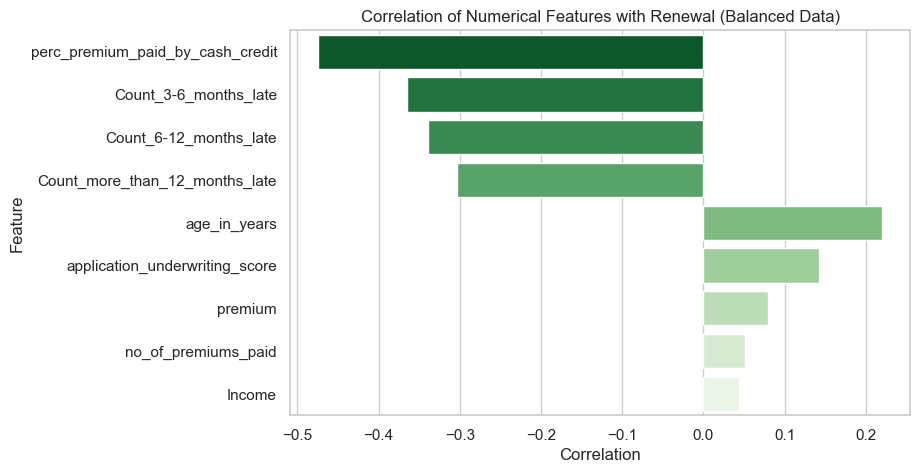

In [307]:
# ----------------------------
# 1) Numerical (Continuous) vs Target (Balanced)
# ----------------------------
results_num_bal = []
for col in num_cols:
    if col != target_col:
        corr, p = pointbiserialr(
            OG_OLA_proc_encoded_imputed_balanced[col],
            OG_OLA_proc_encoded_imputed_balanced[target_col]
        )
        results_num_bal.append([col, corr, p])

num_corr_bal_df = pd.DataFrame(results_num_bal, columns=['Feature','Correlation','p-value'])

plt.figure(figsize=(8,5))
sns.barplot(x='Correlation', y='Feature',
            data=num_corr_bal_df.sort_values(by='Correlation', key=abs, ascending=False),
            palette="Greens_r")
plt.title("Correlation of Numerical Features with Renewal (Balanced Data)")
plt.show()


In [309]:
OG_OLA_proc_imputed_balanced.describe()

,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,age_in_years,renewal
count,149710.000000,1.497100e+05,149710.000000,149710.000000,149710.000000,149710.000000,149710.000000,149710.000000,149710.000000,149710.000000
mean,0.460482,1.944048e+05,0.553597,0.301763,0.193153,98.976277,10.651186,10312.068666,49.173649,0.500000
std,0.376975,3.897055e+05,1.097750,0.879262,0.590622,0.802025,5.488891,9077.758929,13.855414,0.500002
min,0.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,21.000000,0.000000
25%,0.074000,9.907000e+04,0.000000,0.000000,0.000000,98.690000,7.000000,5400.000000,39.000000,0.000000
50%,0.403000,1.523800e+05,0.000000,0.000000,0.000000,99.140000,10.000000,7500.000000,48.000000,0.500000
75%,0.861000,2.359000e+05,1.000000,0.000000,0.000000,99.500000,14.000000,13800.000000,59.000000,1.000000
max,1.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,103.000000,1.000000


In [311]:
cat_cols

['sourcing_channel', 'residence_area_type']

/var/folders/px/m5h1yxzn2qz9mnt9ftzp3hqc0000gn/T/ipykernel_29728/1052512716.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CramersV', y='Feature',


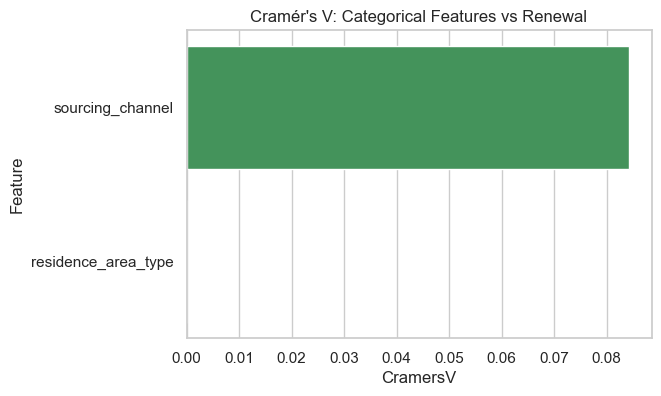

In [313]:
# ----------------------------
# 2) Categorical vs Target
# ----------------------------
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1),(rcorr-1)))

results_cat = []
for col in cat_cols:
    cv = cramers_v(OG_OLA_proc_imputed_balanced[col], OG_OLA_proc_imputed_balanced[target_col])
    results_cat.append([col, cv])

cat_corr_df = pd.DataFrame(results_cat, columns=['Feature','CramersV'])

plt.figure(figsize=(6,4))
sns.barplot(x='CramersV', y='Feature',
            data=cat_corr_df.sort_values(by='CramersV', ascending=False),
            palette="Greens_r")
plt.title("Cramér's V: Categorical Features vs Renewal")
plt.show()


=== Class distribution for 'residence_area_type' (top rows) ===
residence_area_type  count_total  count_0  count_1    pct_0     pct_1  renewal_rate_pct
              Urban        48183     3000    45183 6.226262 93.773738             93.77
              Rural        31670     1998    29672 6.308810 93.691190             93.69


/var/folders/px/m5h1yxzn2qz9mnt9ftzp3hqc0000gn/T/ipykernel_29728/3040112568.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='renewal_rate_pct', y=col, orient='h', palette='viridis')


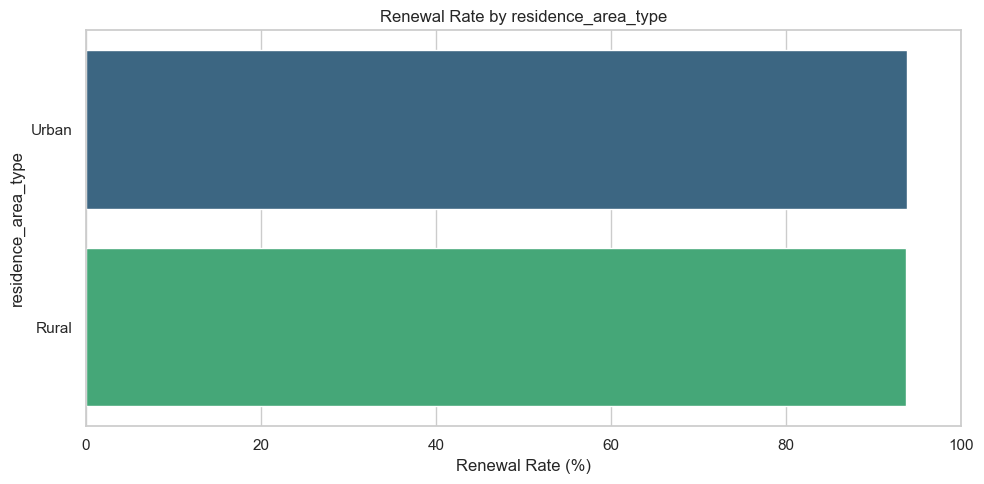


=== Class distribution for 'sourcing_channel' (top rows) ===
sourcing_channel  count_total  count_0  count_1    pct_0     pct_1  renewal_rate_pct
               A        43134     2349    40785 5.445820 94.554180             94.55
               B        16512     1066    15446 6.455911 93.544089             93.54
               C        12039      903    11136 7.500623 92.499377             92.50
               E          609       46      563 7.553366 92.446634             92.45
               D         7559      634     6925 8.387353 91.612647             91.61


/var/folders/px/m5h1yxzn2qz9mnt9ftzp3hqc0000gn/T/ipykernel_29728/3040112568.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='renewal_rate_pct', y=col, orient='h', palette='viridis')


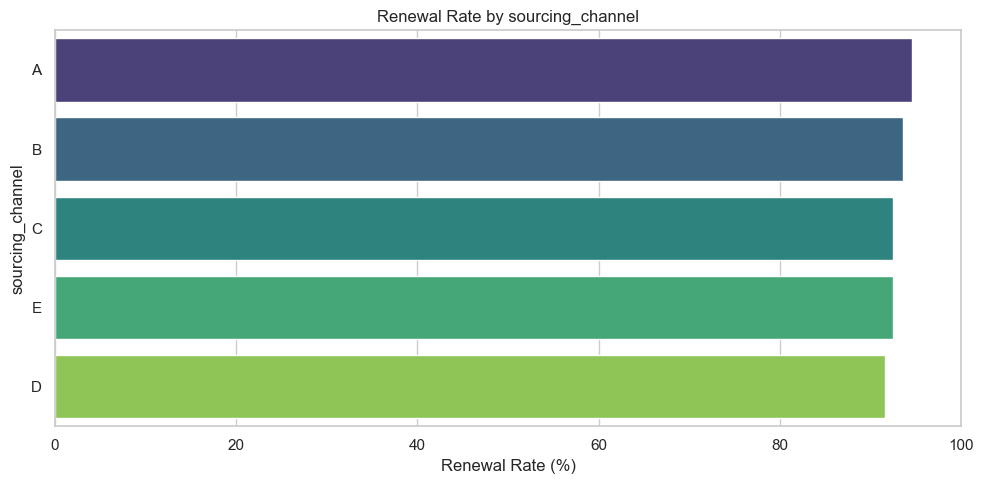

In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from typing import Dict, List, Tuple

def class_distribution_by_categoricals(df: pd.DataFrame, cat_cols: List[str], target_col: str = "renewal",
                                       save_summary: bool = False, out_dir: str = "eda_outputs") -> Dict[str, pd.DataFrame]:
    """
    For each categorical column in cat_cols:
      - computes counts and percentages of target classes per category
      - returns a dict of summary DataFrames
      - plots renewal % per category (barplot)
      - displays results only (file saving functionality removed).
    
    Returns:
      summaries: dict {col_name: summary_df}
    """
    # os.makedirs(out_dir, exist_ok=True) # Removed: Not strictly needed if not saving files
    summaries = {}
    sns.set_style("whitegrid")

    # Standardize target column name for safety if needed
    if target_col not in df.columns:
        print(f"Error: Target column '{target_col}' not found in the DataFrame.")
        return summaries

    # Ensure the target column is treated as categorical/discrete for the cross-tabulation
    df[target_col] = df[target_col].astype('category') 

    for col in cat_cols:
        if col not in df.columns:
            print(f"Warning: {col} not in dataframe columns — skipping.")
            continue
            
        temp = df[[col, target_col]].dropna(subset=[col, target_col]).copy()
        
        # counts per category and per class
        counts = temp.groupby(col)[target_col].value_counts().unstack(fill_value=0)
        counts.columns = [f"count_{str(c)}" for c in counts.columns]
        counts['count_total'] = counts.sum(axis=1)
        
        # percentages (row-normalized)
        pct = temp.groupby(col)[target_col].value_counts(normalize=True).unstack(fill_value=0) * 100
        pct.columns = [f"pct_{str(c)}" for c in pct.columns]
        
        # combine
        summary = pd.concat([counts, pct], axis=1).reset_index()
        
        # ensure columns for both classes exist (assuming '0' and '1')
        for c in ['0', '1']:
            if f"count_{c}" not in summary.columns:
                summary[f"count_{c}"] = 0
            if f"pct_{c}" not in summary.columns:
                summary[f"pct_{c}"] = 0.0
                
        # renewal rate alias (assuming '1' is the renewal class)
        summary['renewal_rate_pct'] = summary['pct_1'].round(2)
        summary = summary.sort_values(by='renewal_rate_pct', ascending=False).reset_index(drop=True)

        summaries[col] = summary

        # Print quick textual summary
        print(f"\n=== Class distribution for '{col}' (top rows) ===")
        display_cols = [col, 'count_total', 'count_0', 'count_1', 'pct_0', 'pct_1', 'renewal_rate_pct']
        print(summary[display_cols].head(20).to_string(index=False))

        # Plot renewal % per category
        num_categories = summary.shape[0]
        fig_height = max(5, 0.5 * num_categories)
        
        plt.figure(figsize=(10, fig_height))
        sns.barplot(data=summary, x='renewal_rate_pct', y=col, orient='h', palette='viridis') 
        
        plt.xlabel("Renewal Rate (%)")
        plt.title(f"Renewal Rate by {col}")
        plt.xlim(0, 100)
        plt.tight_layout()

        # The 'if save_summary:' block now only contains a placeholder and no saving logic
        if save_summary:
            pass # Saving plots/CSVs has been removed

        plt.show()

    return summaries
# -----------------------
# Usage example:
# -----------------------
cat_features = ["residence_area_type", "sourcing_channel"]  # add other categorical columns you want
summaries = class_distribution_by_categoricals(OG_OLA_proc, cat_features, target_col="renewal",
                                               save_summary=True, out_dir="eda_outputs")
# summaries['residence_area_type']  # inspect specific summary DataFrame


/var/folders/px/m5h1yxzn2qz9mnt9ftzp3hqc0000gn/T/ipykernel_29728/1847619609.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MI_Score", y="Feature", data=mi_df_bal, palette="viridis")


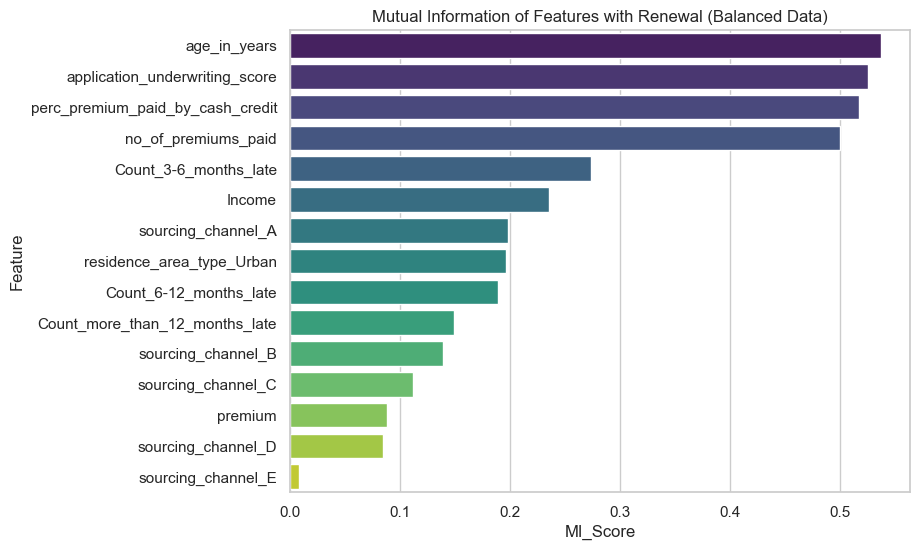

                      Feature  MI_Score
10         sourcing_channel_A  0.198054
9   residence_area_type_Urban  0.196515
11         sourcing_channel_B  0.138849
12         sourcing_channel_C  0.111666
13         sourcing_channel_D  0.084748
14         sourcing_channel_E  0.007957


In [317]:
from sklearn.feature_selection import mutual_info_classif

# Prepare data (use balanced + imputed + encoded dataset)
X_bal = OG_OLA_proc_encoded_imputed_balanced.drop(columns=[target_col])
y_bal = OG_OLA_proc_encoded_imputed_balanced[target_col]

# Compute Mutual Information for all features
mi_scores_bal = mutual_info_classif(X_bal, y_bal, discrete_features='auto', random_state=42)

# Put into DataFrame for easy view
mi_df_bal = pd.DataFrame({
    "Feature": X_bal.columns,
    "MI_Score": mi_scores_bal
}).sort_values(by="MI_Score", ascending=False)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x="MI_Score", y="Feature", data=mi_df_bal, palette="viridis")
plt.title("Mutual Information of Features with Renewal (Balanced Data)")
plt.show()

# Focus on sourcing_channel & residence_area_type
print(mi_df_bal[mi_df_bal['Feature'].str.contains("sourcing_channel|residence_area_type")])


### Feature Importance Insights

- No single feature shows strong predictive power for renewal when analyzed individually.  
- Late payment history and premium-related variables provide the highest signal, but even their effect sizes are small.  
- Mutual Information and correlation analysis confirm that most features carry only weak standalone associations with renewal.  
- However, when combined in multivariate models, these weak signals accumulate and allow tree-based methods (e.g., XGBoost) to achieve strong predictive performance (AUC ~0.85).  

**Takeaway:** The dataset does not have a "silver bullet" predictor. Predictive power comes from combining many weak features rather than relying on one dominant driver.


In [320]:
anchor = 'residence_area_type'   # fixed first index
target = 'renewal'
n_bins = 4                       # quartiles for numeric features

# features to pair with the anchor (exclude anchor + target)
all_feats = [c for c in OG_OLA_proc_imputed_balanced.columns if c not in [anchor, target]]

def bin_numeric(series, q=n_bins):
    """Bin numeric series with qcut; fallback to equal-width if needed."""
    try:
        return pd.qcut(series, q=q, duplicates='drop')
    except Exception:
        # fallback when too many ties or low unique values
        return pd.cut(series, bins=q)

crosstabs = {}  # store results if you want to reuse

for feat in all_feats:
    s_anchor = OG_OLA_proc_imputed_balanced[anchor]
    s_feat = OG_OLA_proc_imputed_balanced[feat]

    if pd.api.types.is_numeric_dtype(s_feat):
        idx2 = bin_numeric(s_feat, q=n_bins)
        title = f"{anchor} × {feat} (binned)"
        idx = [s_anchor, idx2]
    else:
        title = f"{anchor} × {feat}"
        idx = [s_anchor, s_feat]

    # Crosstab: row-wise proportions of renewal 0/1
    ct = pd.crosstab(idx, OG_OLA_proc_imputed_balanced[target], normalize='index')

    # Optional: nicer column names 0/1 → ['0','1']
    ct.columns = [0, 1]

    crosstabs[feat] = ct

    print(f"\n=== {title} ===")
    display(ct)   # in notebooks this renders like your example



=== residence_area_type × perc_premium_paid_by_cash_credit (binned) ===


0         1
residence_area_type perc_premium_paid_by_cash_credit                    
Rural               (-0.001, 0.074]                   0.242573  0.757427
                    (0.074, 0.403]                    0.355243  0.644757
                    (0.403, 0.861]                    0.621844  0.378156
                    (0.861, 1.0]                      0.785536  0.214464
Urban               (-0.001, 0.074]                   0.231246  0.768754
                    (0.074, 0.403]                    0.354597  0.645403
                    (0.403, 0.861]                    0.628965  0.371035
                    (0.861, 1.0]                      0.782568  0.217432


=== residence_area_type × Income (binned) ===


0         1
residence_area_type Income                                    
Rural               (24029.999, 99070.0]    0.597427  0.402573
                    (99070.0, 152380.0]     0.537583  0.462417
                    (152380.0, 235900.0]    0.470068  0.529932
                    (235900.0, 90262600.0]  0.395301  0.604699
Urban               (24029.999, 99070.0]    0.591792  0.408208
                    (99070.0, 152380.0]     0.521549  0.478451
                    (152380.0, 235900.0]    0.473875  0.526125
                    (235900.0, 90262600.0]  0.411829  0.588171


=== residence_area_type × Count_3-6_months_late (binned) ===


0         1
residence_area_type Count_3-6_months_late                    
Rural               (-0.001, 1.0]          0.447131  0.552869
                    (1.0, 13.0]            0.851248  0.148752
Urban               (-0.001, 1.0]          0.444079  0.555921
                    (1.0, 13.0]            0.853062  0.146938


=== residence_area_type × Count_6-12_months_late (binned) ===


,,0,1
residence_area_type,Count_6-12_months_late,,
Rural,"(-0.001, 17.0]",0.501286,0.498714
Urban,"(-0.001, 17.0]",0.499152,0.500848



=== residence_area_type × Count_more_than_12_months_late (binned) ===


,,0,1
residence_area_type,Count_more_than_12_months_late,,
Rural,"(-0.001, 11.0]",0.501286,0.498714
Urban,"(-0.001, 11.0]",0.499152,0.500848



=== residence_area_type × application_underwriting_score (binned) ===


0         1
residence_area_type application_underwriting_score                    
Rural               (91.899, 98.69]                 0.622738  0.377262
                    (98.69, 99.14]                  0.480551  0.519449
                    (99.14, 99.5]                   0.441577  0.558423
                    (99.5, 99.89]                   0.457338  0.542662
Urban               (91.899, 98.69]                 0.617020  0.382980
                    (98.69, 99.14]                  0.496084  0.503916
                    (99.14, 99.5]                   0.428470  0.571530
                    (99.5, 99.89]                   0.454212  0.545788


=== residence_area_type × no_of_premiums_paid (binned) ===


0         1
residence_area_type no_of_premiums_paid                    
Rural               (1.999, 7.0]         0.577634  0.422366
                    (7.0, 10.0]          0.429985  0.570015
                    (10.0, 14.0]         0.470093  0.529907
                    (14.0, 60.0]         0.503919  0.496081
Urban               (1.999, 7.0]         0.556865  0.443135
                    (7.0, 10.0]          0.444813  0.555187
                    (10.0, 14.0]         0.465699  0.534301
                    (14.0, 60.0]         0.516523  0.483477


=== residence_area_type × sourcing_channel ===


0         1
residence_area_type sourcing_channel                    
Rural               A                 0.466105  0.533895
                    B                 0.513403  0.486597
                    C                 0.542441  0.457559
                    D                 0.579302  0.420698
                    E                 0.511673  0.488327
Urban               A                 0.460627  0.539373
                    B                 0.508347  0.491653
                    C                 0.549970  0.450030
                    D                 0.579016  0.420984
                    E                 0.548480  0.451520


=== residence_area_type × premium (binned) ===


0         1
residence_area_type premium                               
Rural               (1199.999, 5400.0]  0.542856  0.457144
                    (5400.0, 7500.0]    0.534014  0.465986
                    (7500.0, 13800.0]   0.466836  0.533164
                    (13800.0, 60000.0]  0.419987  0.580013
Urban               (1199.999, 5400.0]  0.544788  0.455212
                    (5400.0, 7500.0]    0.529684  0.470316
                    (7500.0, 13800.0]   0.473330  0.526670
                    (13800.0, 60000.0]  0.425391  0.574609


=== residence_area_type × age_in_years (binned) ===


0         1
residence_area_type age_in_years                      
Rural               (20.999, 39.0]  0.611445  0.388555
                    (39.0, 48.0]    0.545271  0.454729
                    (48.0, 59.0]    0.502216  0.497784
                    (59.0, 103.0]   0.323069  0.676931
Urban               (20.999, 39.0]  0.592557  0.407443
                    (39.0, 48.0]    0.557080  0.442920
                    (48.0, 59.0]    0.496389  0.503611
                    (59.0, 103.0]   0.338417  0.661583


=== residence_area_type × age_group ===


0         1
residence_area_type age_group                    
Rural               <25        0.612981  0.387019
                    25-40      0.606014  0.393986
                    40-60      0.515442  0.484558
                    60+        0.318035  0.681965
Urban               <25        0.649464  0.350536
                    25-40      0.583995  0.416005
                    40-60      0.521324  0.478676
                    60+        0.327058  0.672942


=== residence_area_type × premium_group ===


0         1
residence_area_type premium_group                    
Rural               Low            0.542856  0.457144
                    Medium         0.534014  0.465986
                    High           0.466836  0.533164
                    Very High      0.419987  0.580013
Urban               Low            0.544788  0.455212
                    Medium         0.529684  0.470316
                    High           0.473330  0.526670
                    Very High      0.425391  0.574609

### Interaction Analysis: Residence Area Type (Urban vs Rural)

Exploratory checks show that `residence_area_type` on its own has almost no influence on renewal outcomes.  
Renewal rates for Urban and Rural customers are nearly identical, making the variable look more like random noise than a meaningful predictor.  

To ensure we were not missing hidden patterns, we extended the analysis to see if `residence_area_type` interacts with other features such as premium, age, income, late payment counts, or sourcing channel.  
Even in this multivariate setting, the observed differences were negligible — with the largest gap being around 2.7% for late payment history, and most others well below 1%.  

**Summary:** `residence_area_type` does not appear to be an impactful driver of renewal, either directly or through interactions.  
- For **tree-based models** (XGBoost, Random Forest, Gradient Boosting), it can be **kept** since these algorithms can automatically handle weak or redundant features.  
- For **statistical models** (Logistic Regression or other linear approaches), it can be **safely removed** to reduce noise and simplify the model.


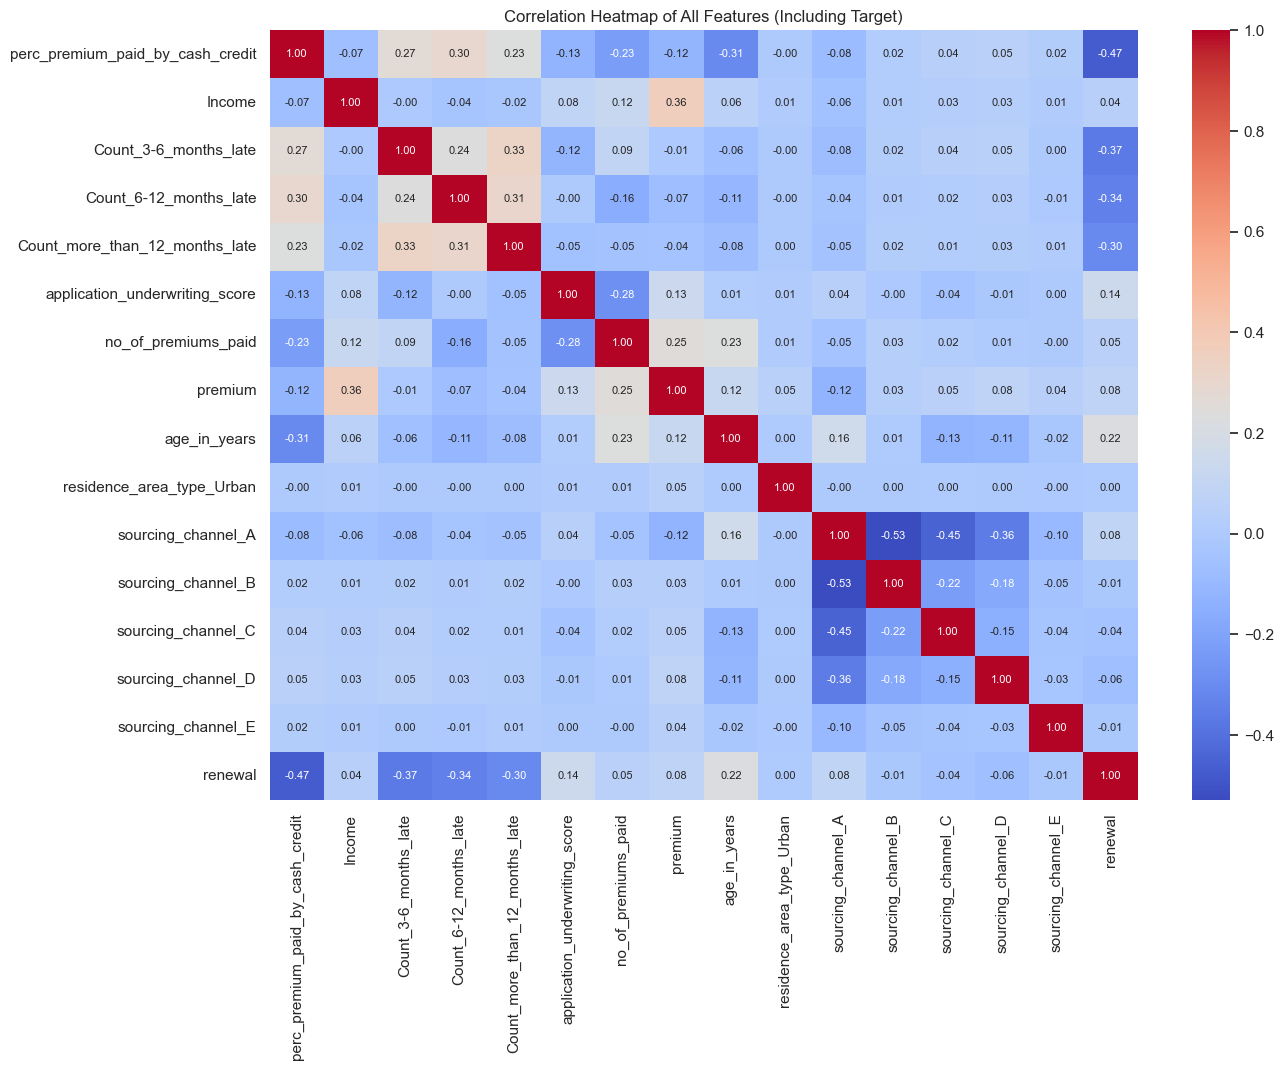

In [323]:
# Compute correlation matrix
corr_matrix = OG_OLA_proc_encoded_imputed_balanced.corr()

# Plot heatmap with correlation values
plt.figure(figsize=(14,10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=True,        # ✅ this adds correlation values
    fmt=".2f",         # format to 2 decimal places
    cbar=True,
    annot_kws={"size":8}  # smaller text size so it fits
)
plt.title("Correlation Heatmap of All Features (Including Target)")
plt.show()

### Feature Distributions by Renewal Status

We plotted the density distributions of key numerical features (premium, income, underwriting score, late payment counts, etc.) across renewal status (0 = Not Renewed, 1 = Renewed).

**Observations:**

- Most features show **substantial overlap** between renewed and not-renewed customers.  
- Feature-wise details:  
  - **Income**: Highly skewed; after log transformation, both groups look very similar with only slight uplift for renewals at the high end.  
  - **Premium** and **No. of Premiums Paid**: Very similar distributions, with only minor shifts.  
  - **Late Payment Counts** (`3–6`, `6–12`, `>12 months late`): Mostly zeros; higher counts are rare but carry signal (more lates → lower renewals).  
  - **Application Underwriting Score**: Overlapping distributions, with only a **slight shift** (renewed customers have marginally higher scores).  
  - **% Premium Paid by Cash/Credit**: Shows the clearest separation — renewed customers peak near low values, while not-renewed show a stronger peak near 1. This feature has **good discriminative power** compared to others.  
  - **Age**: Distribution is shifted — younger customers skew toward non-renewal, older customers toward renewal, though overlap is still present.

**Implications:**

- No single feature is a perfect discriminator.  
- Some features (e.g., `perc_premium_paid_by_cash_credit`, late-payment counts, age) provide stronger signal than others.  
- Renewal behavior is likely explained by **interactions across multiple features** rather than any one variable.  
- Linear models (e.g., Logistic Regression) may struggle to capture this overlap and non-linear behavior.

**Modeling Direction:**

- Use **tree-based ensemble methods** (Random Forest, XGBoost, LightGBM, CatBoost), which:  
  - Capture **non-linear relationships and interactions**.  
  - Are robust to **outliers and skewed distributions**.  
  - Can make use of rare but informative values (e.g., high late counts).  
- Bagging (Random Forest) for robustness; boosting (XGBoost/LightGBM/CatBoost) for higher predictive power.  
- Consider **ensembling** multiple models for additional stability.

**Conclusion:**  
Because most features overlap heavily, the predictive task requires models that can integrate **weak but complementary signals** across variables.  
We will rely on **tree-based ensembles**, as they are best suited for handling overlap, non-linearities, and outliers in this dataset.


### Final Model Decision
- Both **outlier analysis** and **EDA** point towards ensemble tree-based methods as the most appropriate.  
- Candidate models:  
  - **Random Forest (Bagging)** – stable and interpretable feature importance.  
  - **Boosting methods (XGBoost / LightGBM / CatBoost)** – strong accuracy and ability to capture subtle interactions.   

We will proceed with **ensemble tree-based models** as the primary modeling approach.


## EDA Documentation Note: 
The comprehensive results of the Exploratory Data Analysis (EDA), including all visualizations and detailed findings, have been compiled into the uploaded presentation file, "EDA Summary PPT."